**Installing all dependencies**

In [ ]:
pip install pytket


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 15.4 MB/s eta 0:00:00


In [ ]:
pip install pytket-qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install pytket-quantinuum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.3/91.3 kB 4.8 MB/s eta 0:00:00


**Example for function f(x) = x + 3 with grover's oracle ( single iteration ) and projection based assertion**

In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np
import math

In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Oracle for function f(x) = x + 3
# This function assumes 1-qubit states for x and f(x)
def fx_oracle(circ):
    # In a 1-qubit example, x can be 0 or 1
    # f(x) = x + 3 would then be 3 or 4 which are 11 and 100 in binary
    # Since we're constrained to 1 qubit for f(x), let's take mod 2, so f(x) becomes 1 or 0.
    circ.CX(0, 1)

# Grover Diffusion Operator for 1 qubit
def grover_diffusion(circ):
    circ.H(0)
    circ.X(0)
    circ.Z(0)
    circ.X(0)
    circ.H(0)

# Main circuit
circ = Circuit(2)  # 1 qubit for 'x' and 1 qubit for 'f(x)'
circ.H(0)  # Initialize 'x' to a superposition of all possible states


# Oracle and Grover Diffusion
fx_oracle(circ)
grover_diffusion(circ)

# Add an assertion to check if f(x) = x + 3
# In a mod 2 system, f(x) would be 1 if x=0 and 0 if x=1
valid_projector = np.array([[0, 0], [0, 1]])  # State |1> for the second qubit
circ.add_assertion(ProjectorAssertionBox(valid_projector), [1], name="f(x)=x+3")

# Run the circuit
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=100)
result = backend.get_result(res_handle)

# Debug Info
debug_info = result.get_debug_info()
print(debug_info)


{'f(x)=x+3': 0.61}


**Example for the same function with Grover's oracle ( multiple iterations ) and projection based assertions with correct and in correct test cases**

In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the oracle for f(x) = x + 3
def fx_oracle(circ):
    circ.CX(0, 1)
    circ.CX(1, 0)
    circ.CX(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>, which corresponds to f(0) = 3
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# Correct Test Case
circ_correct = Circuit(2)
circ_correct.X(0).X(0)  # Explicitly setting to |00>
circ_correct.X(1).X(1)

n_iterations = 9
  # Adjust this number as needed

# Apply the Grover iteration multiple times
for _ in range(n_iterations):
    fx_oracle(circ_correct)
    grover_diffusion(circ_correct)

#fx_oracle(circ_correct)
#grover_diffusion(circ_correct)
circ_correct.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="f(x)=x+3 Correct")

compiled_circ_correct = backend.get_compiled_circuit(circ_correct)
res_handle_correct = backend.process_circuit(compiled_circ_correct, n_shots=10000)
result_correct = backend.get_result(res_handle_correct)

print("Correct Test Case Results:", result_correct.get_counts())
print("Debug Info for Correct Case:", result_correct.get_debug_info())

# Incorrect Test Cases (Setting the initial state to |01>, |10>)

incorrect_states = [[0, 1], [1, 0]]

for state in incorrect_states:
    circ_incorrect = Circuit(2)
    for i, val in enumerate(state):
        if val:
            circ_incorrect.X(i)

    n_iterations = 1  # Adjust this number as needed

    # Apply the Grover iteration multiple times
    for _ in range(n_iterations):
        fx_oracle(circ_incorrect)
        grover_diffusion(circ_incorrect)
    #fx_oracle(circ_incorrect)
    #grover_diffusion(circ_incorrect)

    circ_incorrect.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name=f"f(x)=x+3 Incorrect for {state}")

    compiled_circ_incorrect = backend.get_compiled_circuit(circ_incorrect)
    res_handle_incorrect = backend.process_circuit(compiled_circ_incorrect, n_shots=10000)
    result_incorrect = backend.get_result(res_handle_incorrect)

    print(f"Incorrect Test Case Results for {state}:", result_incorrect.get_counts())
    print(f"Debug Info for Incorrect Case {state}:", result_incorrect.get_debug_info())


Correct Test Case Results: Counter({(0, 1): 2609, (1, 1): 2498, (1, 0): 2466, (0, 0): 2427})
Debug Info for Correct Case: {'f(x)=x+3 Correct': 0.2427}
Incorrect Test Case Results for [0, 1]: Counter({(1, 1): 2596, (0, 1): 2491, (0, 0): 2476, (1, 0): 2437})
Debug Info for Incorrect Case [0, 1]: {'f(x)=x+3 Incorrect for [0, 1]': 0.2476}
Incorrect Test Case Results for [1, 0]: Counter({(1, 0): 2534, (0, 0): 2504, (1, 1): 2486, (0, 1): 2476})
Debug Info for Incorrect Case [1, 0]: {'f(x)=x+3 Incorrect for [1, 0]': 0.2504}


**Example for the same function with Grover's oracle and projection based iterations only for correct test cases with improved iteration calculations**

In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the oracle for f(x) = x + 3
def fx_oracle(circ):
    circ.CX(0, 1)
    circ.CX(1, 0)
    circ.CX(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>, which corresponds to f(0) = 3
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1  # The state |11> corresponds to the index 3

# Number of qubits
n_qubits = 2

# Optimal number of Grover iterations
n_iterations = int(np.floor(np.pi / 4 * np.sqrt(2 ** n_qubits)))

# Initialize circuit
circ = Circuit(n_qubits)

# Initialize to a superposition of all possible states
circ.H(0)
circ.H(1)

# Apply the Grover iteration multiple times
for _ in range(n_iterations):
    fx_oracle(circ)
    grover_diffusion(circ)

# Add an assertion to check if f(x) = x + 3
circ.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="f(x)=x+3")

# Compile and run the circuit
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

# Debug Info
debug_info = result.get_debug_info()
print(debug_info)


{'f(x)=x+3': 0.249534}


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the oracle for f(x) = x + 3
def fx_oracle(circ):
    circ.CX(0, 1)
    circ.CX(1, 0)
    circ.CX(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>, which corresponds to f(0) = 3
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# Correct Test Case
circ_correct = Circuit(2)

n_iterations = 1  # for small databases, fewer iterations work well

# Apply the Grover iteration multiple times
for _ in range(n_iterations):
    fx_oracle(circ_correct)
    grover_diffusion(circ_correct)

circ_correct.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="f(x)=x+3 Correct")

compiled_circ_correct = backend.get_compiled_circuit(circ_correct)
res_handle_correct = backend.process_circuit(compiled_circ_correct, n_shots=10000)
result_correct = backend.get_result(res_handle_correct)

print("Correct Test Case Results:", result_correct.get_counts())
print("Debug Info for Correct Case:", result_correct.get_debug_info())

# Incorrect Test Cases
incorrect_states = [[0, 1], [1, 0]]

for state in incorrect_states:
    circ_incorrect = Circuit(2)
    for i, val in enumerate(state):
        if val:
            circ_incorrect.X(i)

    n_iterations = 1  # fewer iterations can avoid diluting the effect of the oracle

    # Apply the Grover iteration multiple times
    for _ in range(n_iterations):
        fx_oracle(circ_incorrect)
        grover_diffusion(circ_incorrect)

    circ_incorrect.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name=f"f(x)=x+3 Incorrect for {state}")

    compiled_circ_incorrect = backend.get_compiled_circuit(circ_incorrect)
    res_handle_incorrect = backend.process_circuit(compiled_circ_incorrect, n_shots=10000)
    result_incorrect = backend.get_result(res_handle_incorrect)

    print(f"Incorrect Test Case Results for {state}:", result_incorrect.get_counts())
    print(f"Debug Info for Incorrect Case {state}:", result_incorrect.get_debug_info())


Correct Test Case Results: Counter({(1, 0): 2565, (1, 1): 2515, (0, 0): 2502, (0, 1): 2418})
Debug Info for Correct Case: {'f(x)=x+3 Correct': 0.2502}
Incorrect Test Case Results for [0, 1]: Counter({(0, 0): 2539, (1, 0): 2514, (1, 1): 2478, (0, 1): 2469})
Debug Info for Incorrect Case [0, 1]: {'f(x)=x+3 Incorrect for [0, 1]': 0.2539}
Incorrect Test Case Results for [1, 0]: Counter({(0, 0): 2518, (0, 1): 2500, (1, 0): 2500, (1, 1): 2482})
Debug Info for Incorrect Case [1, 0]: {'f(x)=x+3 Incorrect for [1, 0]': 0.2518}


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

def fx_oracle(circ):
    circ.CX(0, 1)
    circ.CX(1, 0)
    circ.CX(0, 1)

def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

backend = AerBackend()

valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1  # The state |11> corresponds to the index 3

circ = Circuit(2)
circ.H(0)
circ.H(1)

# Number of Grover iterations. For a small database, fewer iterations are better.
n_iterations = 1
for _ in range(n_iterations):
    fx_oracle(circ)
    grover_diffusion(circ)

circ.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="f(x)=x+3")

compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

print("Results:", result.get_counts())
print("Debug Info:", result.get_debug_info())


Results: Counter({(1, 1): 2521, (0, 0): 2519, (1, 0): 2486, (0, 1): 2474})
Debug Info: {'f(x)=x+3': 0.2519}


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the oracle for marking |11> state
def fx_oracle(circ):
    circ.CZ(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

backend = AerBackend()
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

circ = Circuit(2)
circ.H(0)  # Initialize to a superposition of all states
circ.H(1)
# Apply the Grover iteration
n_iterations = 2  # Set the number of iterations here

for _ in range(n_iterations):
    fx_oracle(circ)
    grover_diffusion(circ)

# Projector only on the main qubits (ignoring the ancilla)
circ.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="Valid projector")

# Compile and run the circuit
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

print("Results:", result.get_counts())
print("Debug Info:", result.get_debug_info())


Results: Counter({(0, 0): 2527, (0, 1): 2504, (1, 1): 2501, (1, 0): 2468})
Debug Info: {'Valid projector': 0.2527}


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend

# Define the oracle for f(x) = x + 3
def fx_oracle(circ):
    circ.CZ(0, 1)  # This will apply a phase flip to the |11> state

# Test the Oracle
circ = Circuit(2)
circ.H(0)  # Start with a uniform superposition
circ.H(1)

# Apply the oracle
fx_oracle(circ)

circ.measure_all()

# Initialize the backend and run the circuit
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

print(result.get_counts())


Counter({(0, 0): 2562, (1, 0): 2522, (1, 1): 2483, (0, 1): 2433})


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend

# Define the oracle for f(x) = x + 3
def fx_oracle(circ):
    circ.CZ(0, 1)  # This will apply a phase flip to the |11> state

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the circuit and backend
circ = Circuit(2)
backend = AerBackend()

# Start with a uniform superposition
circ.H(0)
circ.H(1)

# Number of iterations
n_iterations = 3  # You can adjust this number

# Apply Grover's iteration multiple times
for _ in range(n_iterations):
    fx_oracle(circ)
    grover_diffusion(circ)

# Measure the qubits
circ.measure_all()

# Run the circuit
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

# Print result
print(result.get_counts())


Counter({(1, 0): 2524, (1, 1): 2514, (0, 1): 2491, (0, 0): 2471})


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)  # Add a phase of -1 to the state |11>

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Create the circuit and add the Hadamard gates to prepare the superposition
circ = Circuit(2)
circ.H(0)
circ.H(1)

# Add the Oracle and the Grover diffusion operator
n_iterations = 1  # You can adjust this number

# Apply Grover's iteration multiple times
for _ in range(n_iterations):
    oracle_11(circ)
    grover_diffusion(circ)

# Add measurements
circ.measure_all()

# Initialize the backend
backend = AerBackend()

# Run the circuit
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

# Get and print the measurement counts
counts = result.get_counts()
print(counts)


Counter({(1, 1): 10000})


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# Create the circuit and add the Hadamard gates to prepare the superposition
circ = Circuit(2)
circ.H(0)
circ.H(1)

# Number of iterations
n_iterations = 1

# Apply the Oracle and the Grover diffusion operator
for _ in range(n_iterations):
    oracle_11(circ)
    grover_diffusion(circ)

# Add a projector-based assertion for the state |11>
circ.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="Assert |11>")

# Add measurements
circ.measure_all()

# Compile the circuit
compiled_circ = backend.get_compiled_circuit(circ)

# Run the circuit
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

# Output the results
print("Results:", result.get_counts())
print("Debug Info:", result.get_debug_info())


Results: Counter({(1, 1, 0, 0): 10000})
Debug Info: {'Assert |11>': 1.0}


**This is the final correct implementation**

In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# Correct Test Case
circ_correct = Circuit(2)
circ_correct.H(0)
circ_correct.H(1)

# Apply the Oracle and the Grover diffusion operator
n_iterations = 1
for _ in range(n_iterations):
    oracle_11(circ_correct)
    grover_diffusion(circ_correct)

circ_correct.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="Assert |11>")
circ_correct.measure_all()

# Run the correct case
compiled_circ_correct = backend.get_compiled_circuit(circ_correct)
res_handle_correct = backend.process_circuit(compiled_circ_correct, n_shots=10000)
result_correct = backend.get_result(res_handle_correct)

print("Correct Test Case Results:", result_correct.get_counts())
print("Debug Info for Correct Case:", result_correct.get_debug_info())

# Incorrect Test Cases
incorrect_states = [[0, 1], [1, 0]]

for state in incorrect_states:
    circ_incorrect = Circuit(2)
    for i, val in enumerate(state):
        if val:
            circ_incorrect.X(i)

    circ_incorrect.H(0)
    circ_incorrect.H(1)

    # Apply the Oracle and the Grover diffusion operator
    n_iterations = 1
    for _ in range(n_iterations):
        oracle_11(circ_incorrect)
        grover_diffusion(circ_incorrect)

    circ_incorrect.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name=f"Assert |11> for {state}")
    circ_incorrect.measure_all()

    # Run the incorrect case
    compiled_circ_incorrect = backend.get_compiled_circuit(circ_incorrect)
    res_handle_incorrect = backend.process_circuit(compiled_circ_incorrect, n_shots=10000)
    result_incorrect = backend.get_result(res_handle_incorrect)

    print(f"Incorrect Test Case Results for {state}:", result_incorrect.get_counts())
    print(f"Debug Info for Incorrect Case {state}:", result_incorrect.get_debug_info())



Correct Test Case Results: Counter({(1, 1, 0, 0): 10000})
Debug Info for Correct Case: {'Assert |11>': 1.0}
Incorrect Test Case Results for [0, 1]: Counter({(0, 1, 1, 0): 10000})
Debug Info for Incorrect Case [0, 1]: {'Assert |11> for [0, 1]': 0.0}
Incorrect Test Case Results for [1, 0]: Counter({(1, 0, 1, 1): 10000})
Debug Info for Incorrect Case [1, 0]: {'Assert |11> for [1, 0]': 0.0}


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np
from collections import Counter

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# List of test cases (first list is the list of correct states, second list is for incorrect states)
test_states = [
    [[1, 1]],  # correct states
    [[0, 0], [0, 1], [1, 0]]  # incorrect states
]

# Loop over correct and incorrect test states
for is_correct, states in enumerate(test_states):
    for state in states:
        circ = Circuit(2)

        # Initialize the qubits based on the test case
        for i, val in enumerate(state):
            if val:
                circ.X(i)

        # Apply H-gates to prepare superposition
        circ.H(0)
        circ.H(1)

        # Apply the Oracle and the Grover diffusion operator
        n_iterations = 1
        for _ in range(n_iterations):
            oracle_11(circ)
            grover_diffusion(circ)

        # Add the projector-based assertion for |11>
        circ.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="Assert |11>")
        circ.measure_all()

        # Run the circuit
        compiled_circ = backend.get_compiled_circuit(circ)
        res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
        result = backend.get_result(res_handle)

        print(f"{'Correct' if is_correct else 'Incorrect'} Test Case Results for {state}:", result.get_counts())
        print(f"Debug Info for {'Correct' if is_correct else 'Incorrect'} Case {state}:", result.get_debug_info())




Incorrect Test Case Results for [1, 1]: Counter({(0, 0, 0, 1): 10000})
Debug Info for Incorrect Case [1, 1]: {'Assert |11>': 0.0}
Correct Test Case Results for [0, 0]: Counter({(1, 1, 0, 0): 10000})
Debug Info for Correct Case [0, 0]: {'Assert |11>': 1.0}
Correct Test Case Results for [0, 1]: Counter({(0, 1, 1, 0): 10000})
Debug Info for Correct Case [0, 1]: {'Assert |11>': 0.0}
Correct Test Case Results for [1, 0]: Counter({(1, 0, 1, 1): 10000})
Debug Info for Correct Case [1, 0]: {'Assert |11>': 0.0}


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# Correct Test Case
circ_correct = Circuit(2)
circ_correct.H(0)
circ_correct.H(1)

# Apply the Oracle and the Grover diffusion operator
n_iterations = 1
for _ in range(n_iterations):
    oracle_11(circ_correct)
    grover_diffusion(circ_correct)

circ_correct.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="Assert |11>")
circ_correct.measure_all()

# Run the correct case
compiled_circ_correct = backend.get_compiled_circuit(circ_correct)
res_handle_correct = backend.process_circuit(compiled_circ_correct, n_shots=10000)
result_correct = backend.get_result(res_handle_correct)

print("Correct Test Case Results:", result_correct.get_counts())
print("Debug Info for Correct Case:", result_correct.get_debug_info())

# Incorrect Test Cases
incorrect_states = [[0, 0], [0, 1], [1, 0]]  # Added [0, 0]

for state in incorrect_states:
    circ_incorrect = Circuit(2)
    for i, val in enumerate(state):
        if val:
            circ_incorrect.X(i)

    circ_incorrect.H(0)
    circ_incorrect.H(1)

    # Apply the Oracle and the Grover diffusion operator
    n_iterations = 1
    for _ in range(n_iterations):
        oracle_11(circ_incorrect)
        grover_diffusion(circ_incorrect)

    circ_incorrect.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name=f"Assert |11> for {state}")
    circ_incorrect.measure_all()

    # Run the incorrect case
    compiled_circ_incorrect = backend.get_compiled_circuit(circ_incorrect)
    res_handle_incorrect = backend.process_circuit(compiled_circ_incorrect, n_shots=10000)
    result_incorrect = backend.get_result(res_handle_incorrect)

    print(f"Incorrect Test Case Results for {state}:", result_incorrect.get_counts())
    print(f"Debug Info for Incorrect Case {state}:", result_incorrect.get_debug_info())


Correct Test Case Results: Counter({(1, 1, 0, 0): 10000})
Debug Info for Correct Case: {'Assert |11>': 1.0}
Incorrect Test Case Results for [0, 0]: Counter({(1, 1, 0, 0): 10000})
Debug Info for Incorrect Case [0, 0]: {'Assert |11> for [0, 0]': 1.0}
Incorrect Test Case Results for [0, 1]: Counter({(0, 1, 1, 0): 10000})
Debug Info for Incorrect Case [0, 1]: {'Assert |11> for [0, 1]': 0.0}
Incorrect Test Case Results for [1, 0]: Counter({(1, 0, 1, 1): 10000})
Debug Info for Incorrect Case [1, 0]: {'Assert |11> for [1, 0]': 0.0}


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend
import numpy as np
from collections import Counter

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# List of test cases (first list is the list of correct states, second list is for incorrect states)
test_states = [
    [[1, 1]],  # correct states
    [[0, 0], [0, 1], [1, 0]]  # incorrect states
]

# Loop over correct and incorrect test states
for is_correct, states in enumerate(test_states):
    for state in states:
        circ = Circuit(2)

        # Initialize the qubits based on the test case
        for i, val in enumerate(state):
            if val:
                circ.X(i)

        # Apply H-gates to prepare superposition
        circ.H(0)
        circ.H(1)

        # Apply the Oracle and the Grover diffusion operator
        n_iterations = 1  # You can try adjusting this
        for _ in range(n_iterations):
            oracle_11(circ)
            grover_diffusion(circ)

        circ.measure_all()

        # Run the circuit
        compiled_circ = backend.get_compiled_circuit(circ)
        res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
        result = backend.get_result(res_handle)

        counts = result.get_counts()
        total_shots = sum(counts.values())
        probabilities = {k: v / total_shots for k, v in counts.items()}

        print(f"{'Correct' if is_correct else 'Incorrect'} Test Case Results for {state}:", counts)
        print(f"Probabilities for {'Correct' if is_correct else 'Incorrect'} Case {state}:", result.get_debug_info())


Incorrect Test Case Results for [1, 1]: Counter({(0, 0): 10000})
Probabilities for Incorrect Case [1, 1]: {}
Correct Test Case Results for [0, 0]: Counter({(1, 1): 10000})
Probabilities for Correct Case [0, 0]: {}
Correct Test Case Results for [0, 1]: Counter({(0, 1): 10000})
Probabilities for Correct Case [0, 1]: {}
Correct Test Case Results for [1, 0]: Counter({(1, 0): 10000})
Probabilities for Correct Case [1, 0]: {}


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the Oracle for marking the state |x>
def oracle(circ, target_state):
    for qubit, state in enumerate(target_state):
        if state == '0':
            circ.X(qubit)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    for qubit, state in enumerate(target_state):
        if state == '0':
            circ.X(qubit)

# Initialize the backend
backend = AerBackend()

# Define correct and incorrect states
correct_states = ["11", "00", "01", "10"]
incorrect_states = ["10", "01", "00", "11"]  # Deliberately incorrect for demonstration

# Test correct states
for target_state in correct_states:
    circ = Circuit(2)
    circ.H(0)
    circ.H(1)

    index = int(target_state, 2)
    projector = np.zeros((4, 4))
    projector[index, index] = 1

    n_iterations = 1  # Adjust as needed
    for _ in range(n_iterations):
        oracle(circ, target_state)

    circ.measure_all()
    circ.add_assertion(ProjectorAssertionBox(projector), [0, 1], name=f"Assert |{target_state}> (Correct)")

    compiled_circ = backend.get_compiled_circuit(circ)
    res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
    result = backend.get_result(res_handle)

    print(f"Correct Test Case Results for {target_state}: {result.get_counts()}")
    print(f"Debug Info for Correct Case {target_state}: {result.get_debug_info()}")

# Test incorrect states
for target_state in incorrect_states:
    circ = Circuit(2)
    circ.H(0)
    circ.H(1)

    index = int(target_state, 2)
    projector = np.zeros((4, 4))
    projector[index, index] = 1

    n_iterations = 1  # Adjust as needed
    for _ in range(n_iterations):
        oracle(circ, target_state)

    circ.measure_all()
    circ.add_assertion(ProjectorAssertionBox(projector), [0, 1], name=f"Assert |{target_state}> (Incorrect)")

    compiled_circ = backend.get_compiled_circuit(circ)
    res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
    result = backend.get_result(res_handle)

    print(f"Incorrect Test Case Results for {target_state}: {result.get_counts()}")
    print(f"Debug Info for Incorrect Case {target_state}: {result.get_debug_info()}")


Correct Test Case Results for 11: Counter({(0, 0, 0, 1): 2523, (1, 0, 1, 1): 2509, (0, 1, 1, 0): 2505, (1, 1, 0, 0): 2463})
Debug Info for Correct Case 11: {'Assert |11> (Correct)': 0.2463}
Correct Test Case Results for 00: Counter({(0, 0, 0, 0): 2516, (1, 1, 1, 1): 2513, (0, 1, 0, 1): 2492, (1, 0, 1, 0): 2479})
Debug Info for Correct Case 00: {'Assert |00> (Correct)': 0.2516}
Correct Test Case Results for 01: Counter({(0, 1, 0, 0): 2537, (1, 0, 1, 0): 2509, (0, 0, 0, 1): 2485, (1, 1, 1, 1): 2469})
Debug Info for Correct Case 01: {'Assert |01> (Correct)': 0.2537}
Correct Test Case Results for 10: Counter({(0, 0, 0, 1): 2591, (1, 1, 1, 1): 2492, (0, 1, 1, 0): 2486, (1, 0, 0, 0): 2431})
Debug Info for Correct Case 10: {'Assert |10> (Correct)': 0.2431}
Incorrect Test Case Results for 10: Counter({(1, 0, 0, 0): 2524, (0, 0, 0, 1): 2517, (1, 1, 1, 1): 2491, (0, 1, 1, 0): 2468})
Debug Info for Incorrect Case 10: {'Assert |10> (Incorrect)': 0.2524}
Incorrect Test Case Results for 01: Counter(

In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define Oracle for f(x) = x + 3
def oracle(circ, target_state):
    for qubit, state in enumerate(target_state):
        if state == '0':
            circ.X(qubit)
    circ.CZ(0, 1)
    for qubit, state in enumerate(target_state):
        if state == '0':
            circ.X(qubit)

# Define the Grover diffusion operator
def diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Correct and incorrect states for f(x) = x + 3
correct_states = ["11", "00", "01", "10"]
incorrect_states = ["10", "01", "00", "11"]  # Intentionally incorrect

# Test the correct states
for target_state in correct_states:
    circ = Circuit(2)
    circ.H(0)
    circ.H(1)

    for _ in range(1):  # Number of Grover iterations
        oracle(circ, target_state)
        diffusion(circ)

    circ.measure_all()
    circ.add_assertion(ProjectorAssertionBox(np.array([[1 if i == j and i == int(target_state, 2) else 0 for i in range(4)] for j in range(4)])), [0, 1])

    compiled_circ = backend.get_compiled_circuit(circ)
    res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
    result = backend.get_result(res_handle)

    print(f"Correct Test Case for {target_state}: {result.get_counts()}")
    print(f"Debug Info: {result.get_debug_info()}")

# Test the incorrect states
for target_state in incorrect_states:
    circ = Circuit(2)
    circ.H(0)
    circ.H(1)

    for _ in range(1):  # Number of Grover iterations
        oracle(circ, target_state)
        diffusion(circ)

    circ.measure_all()
    circ.add_assertion(ProjectorAssertionBox(np.array([[1 if i == j and i == int(target_state, 2) else 0 for i in range(4)] for j in range(4)])), [0, 1])

    compiled_circ = backend.get_compiled_circuit(circ)
    res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
    result = backend.get_result(res_handle)

    print(f"Incorrect Test Case for {target_state}: {result.get_counts()}")
    print(f"Debug Info: {result.get_debug_info()}")


Correct Test Case for 11: Counter({(1, 1, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}
Correct Test Case for 00: Counter({(0, 0, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}
Correct Test Case for 01: Counter({(0, 1, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}
Correct Test Case for 10: Counter({(1, 0, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}
Incorrect Test Case for 10: Counter({(1, 0, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}
Incorrect Test Case for 01: Counter({(0, 1, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}
Incorrect Test Case for 00: Counter({(0, 0, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}
Incorrect Test Case for 11: Counter({(1, 1, 0, 0): 10000})
Debug Info: {'tket_assert': 1.0}


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend

def fx_oracle(circ):
    # Here, qubits 0-3 will be for 'x' and qubits 4-7 will be for 'f(x) = x + 3'.
    # Assume that 'x' is already in a superposition of all possible states (which will be done outside this function).

    # Compute f(x) = x + 3 (This part can get complex; let's skip it for now and assume f(x) is directly given)

    # Apply a multi-controlled-Z gate to flip the phase of the state |0100> in the f(x) register.
    # Assuming you have a way to apply a multi-controlled-Z gate, you can target the qubits 4-7
    # This will act as a very simplified oracle for now
    circ.CZ(4, 7)  # Note: This is just a placeholder; you'll want to replace this with the correct multi-controlled-Z

# Initialize a circuit
circ = Circuit(8)  # Using 8 qubits: 4 for 'x' and 4 for 'f(x)'

# Initialize 'x' to a superposition of all states
circ.H(0)
circ.H(1)
circ.H(2)
circ.H(3)

# Apply the oracle
fx_oracle(circ)
circ.measure_all()

# Check if the oracle works as expected
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)
print(result.get_counts())


Counter({(0, 0, 1, 1, 0, 0, 0, 0): 677, (1, 0, 0, 1, 0, 0, 0, 0): 662, (1, 1, 1, 0, 0, 0, 0, 0): 650, (0, 0, 0, 1, 0, 0, 0, 0): 640, (1, 0, 1, 0, 0, 0, 0, 0): 638, (0, 1, 0, 0, 0, 0, 0, 0): 632, (1, 1, 0, 1, 0, 0, 0, 0): 624, (0, 0, 0, 0, 0, 0, 0, 0): 620, (0, 1, 0, 1, 0, 0, 0, 0): 617, (0, 1, 1, 1, 0, 0, 0, 0): 615, (0, 0, 1, 0, 0, 0, 0, 0): 614, (1, 1, 0, 0, 0, 0, 0, 0): 608, (0, 1, 1, 0, 0, 0, 0, 0): 606, (1, 1, 1, 1, 0, 0, 0, 0): 606, (1, 0, 1, 1, 0, 0, 0, 0): 602, (1, 0, 0, 0, 0, 0, 0, 0): 589})


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend

def fx_oracle(circ):
    # Qubits 0-3 are for 'x' and qubits 4-7 are for 'f(x) = x + 3'.
    # Add 3 to the input x to get f(x) (simplified for demo)

    circ.X(7)  # Set the constant 3 (binary 0011)
    circ.X(6)

    circ.CCX(0, 6, 7)  # Add x[0] and the constant, with carry to f(x)[3]
    circ.CX(0, 6)  # Add x[0] and the constant
    circ.CCX(1, 5, 6)  # Add x[1] and the constant, with carry to f(x)[2]
    circ.CX(1, 5)  # Add x[1] and the constant

    circ.CCX(2, 4, 5)  # Add x[2] and the constant, with carry to f(x)[1]
    circ.CX(2, 4)  # Add x[2] and the constant

    # Add x[3] and a carry to f(x)[0], this time without reusing the same qubit
    circ.CCX(3, 4, 5)

    # Assuming you have applied the correct f(x) = x + 3 oracle,
    # Now flip the phase based on the f(x) values of interest
    circ.H(7)
    circ.CZ(4, 7)  # Flip phase of f(x) = 4 (100)
    circ.H(7)

# Initialize a circuit with 8 qubits
circ = Circuit(8)

# Initialize 'x' to a superposition of all states
circ.H(0)
circ.H(1)
circ.H(2)
circ.H(3)

# Apply the oracle
fx_oracle(circ)

# Measure all qubits
circ.measure_all()

# Run the circuit
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

# Print the counts
print(result.get_counts())



Counter({(1, 1, 0, 1, 0, 1, 0, 0): 655, (0, 0, 1, 0, 1, 0, 1, 0): 642, (1, 0, 0, 1, 0, 0, 0, 0): 640, (0, 1, 1, 1, 1, 0, 1, 0): 637, (0, 1, 0, 1, 0, 1, 1, 1): 636, (1, 1, 1, 0, 1, 1, 0, 1): 636, (1, 1, 1, 1, 1, 0, 0, 1): 634, (1, 1, 0, 0, 0, 1, 0, 0): 631, (0, 0, 0, 1, 0, 0, 1, 1): 627, (0, 1, 0, 0, 0, 1, 1, 1): 618, (0, 1, 1, 0, 1, 1, 1, 0): 617, (1, 0, 0, 0, 0, 0, 0, 0): 616, (1, 0, 1, 1, 1, 1, 0, 1): 616, (1, 0, 1, 0, 1, 0, 0, 1): 614, (0, 0, 0, 0, 0, 0, 1, 1): 595, (0, 0, 1, 1, 1, 1, 1, 0): 586})


In [ ]:
from pytket.circuit import Circuit, OpType, Qubit
from pytket.extensions.qiskit import AerBackend

def fx_oracle(circ):
    # The last qubit will be used as an ancilla
    ancilla = Qubit(8)

    # Initialize the ancilla to |->
    circ.X(ancilla)
    circ.H(ancilla)

    # Implement multi-controlled-Z by sandwiching with Hadamard and Toffoli gates
    circ.H(ancilla)
    controls = [Qubit(i + 4) for i in range(4)]
    circ.add_gate(OpType.CnX, controls + [ancilla])
    circ.H(ancilla)

    # Uncompute the ancilla to |->
    circ.H(ancilla)
    circ.X(ancilla)

# Initialize a circuit
circ = Circuit(9)  # 8 for x and f(x), 1 for the ancilla

# Initialize 'x' to a superposition
for i in range(4):
    circ.H(Qubit(i))

# Apply the oracle
fx_oracle(circ)

# Measure the main qubits (skip the ancilla)
#for i in range(8):
 #   circ.Measure(i, i)
circ.measure_all()
# Simulate the circuit
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=1000)
result = backend.get_result(res_handle)

# Output the results
print(result.get_counts())



Counter({(0, 1, 1, 1, 0, 0, 0, 0, 0): 77, (1, 1, 0, 1, 0, 0, 0, 0, 0): 77, (1, 1, 1, 0, 0, 0, 0, 0, 0): 75, (1, 0, 0, 1, 0, 0, 0, 0, 0): 72, (0, 0, 0, 1, 0, 0, 0, 0, 0): 69, (0, 0, 1, 1, 0, 0, 0, 0, 0): 66, (0, 1, 0, 0, 0, 0, 0, 0, 0): 64, (0, 1, 1, 0, 0, 0, 0, 0, 0): 64, (0, 0, 1, 0, 0, 0, 0, 0, 0): 61, (0, 1, 0, 1, 0, 0, 0, 0, 0): 61, (1, 0, 1, 0, 0, 0, 0, 0, 0): 59, (0, 0, 0, 0, 0, 0, 0, 0, 0): 57, (1, 0, 0, 0, 0, 0, 0, 0, 0): 56, (1, 1, 0, 0, 0, 0, 0, 0, 0): 51, (1, 0, 1, 1, 0, 0, 0, 0, 0): 47, (1, 1, 1, 1, 0, 0, 0, 0, 0): 44})


In [ ]:
from pytket.circuit import Circuit, OpType, Qubit
from pytket.extensions.qiskit import AerBackend

def fx_oracle(circ):
    # Initialize f(x) to 15 (all bits to 1) since we're working mod 16
    for i in range(4, 8):
        circ.X(Qubit(i))

    # Add x to f(x) bitwise (mod 2)
    for i in range(4):
        circ.CX(Qubit(i), Qubit(i + 4))

    # Initialize the ancilla to |->
    ancilla = Qubit(8)
    circ.X(ancilla)
    circ.H(ancilla)

    # Implement multi-controlled-Z using the f(x) as controls and the ancilla as target
    controls = [Qubit(i) for i in range(4, 8)]
    circ.add_gate(OpType.CnX, controls + [ancilla])

    # Uncompute the ancilla to |->
    circ.H(ancilla)
    circ.X(ancilla)

# Initialize a circuit with 9 qubits (4 for x, 4 for f(x), 1 for ancilla)
circ = Circuit(9)

# Initialize 'x' to a superposition
for i in range(4):
    circ.H(Qubit(i))

# Apply the oracle
fx_oracle(circ)

# Measure the main qubits (skip the ancilla)
circ.measure_all()

# Simulate the circuit
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=1000)
result = backend.get_result(res_handle)

# Output the results
print(result.get_counts())


Counter({(1, 1, 1, 0, 0, 0, 0, 1, 0): 93, (1, 1, 1, 1, 0, 0, 0, 0, 0): 74, (0, 1, 1, 1, 1, 0, 0, 0, 0): 73, (0, 0, 0, 1, 1, 1, 1, 0, 0): 70, (1, 0, 1, 0, 0, 1, 0, 1, 0): 66, (1, 0, 0, 0, 0, 1, 1, 1, 0): 65, (1, 1, 0, 0, 0, 0, 1, 1, 0): 64, (0, 0, 1, 0, 1, 1, 0, 1, 0): 63, (1, 1, 0, 1, 0, 0, 1, 0, 0): 61, (0, 1, 0, 0, 1, 0, 1, 1, 0): 58, (0, 0, 1, 1, 1, 1, 0, 0, 0): 55, (1, 0, 0, 1, 0, 1, 1, 0, 0): 55, (0, 1, 0, 1, 1, 0, 1, 0, 0): 54, (0, 1, 1, 0, 1, 0, 0, 1, 0): 51, (0, 0, 0, 0, 1, 1, 1, 1, 0): 49, (1, 0, 1, 1, 0, 1, 0, 0, 0): 49})


In [ ]:
from pytket import Circuit, Qubit, Bit
from pytket.extensions.qiskit import AerBackend

# Define the oracle for f(x) = x + 3 mod 4
def fx_oracle(circ):
    # Copy input to output
    circ.CX(Qubit(0), Qubit(2))
    circ.CX(Qubit(1), Qubit(3))

    # Add 3 mod 4 (flip both output bits)
    circ.X(Qubit(2))
    circ.X(Qubit(3))

# Initialize circuit
circ = Circuit(4, 4)

# Initialize the input qubits to a superposition
circ.H(Qubit(0))
circ.H(Qubit(1))

# Apply the oracle
fx_oracle(circ)

# Measure the qubits
for i in range(4):
    circ.Measure(Qubit(i), Bit(i))

# Simulate the circuit
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=1000)
result = backend.get_result(res_handle)

# Output the results
print(result.get_counts())











Counter({(1, 0, 0, 1): 270, (0, 1, 1, 0): 254, (1, 1, 0, 0): 245, (0, 0, 1, 1): 231})


In [ ]:
from pytket.circuit import Circuit, Qubit, Bit
from pytket.extensions.qiskit import AerBackend
from collections import Counter
from math import pi

# Oracle to mark the states 3, 4, 5, 6, 7, 8, 9
def oracle_mod10(circ):
    ancilla = Qubit(4)

    for state in [3, 4, 5, 6, 7, 8, 9]:
        binary_state = [int(x) for x in format(state, '04b')]
        for q, val in enumerate(reversed(binary_state)):
            if val == 0:
                circ.X(Qubit(q))

        circ.CCX(Qubit(0), Qubit(1), ancilla)
        circ.CCX(Qubit(2), Qubit(3), ancilla)

        for q, val in enumerate(reversed(binary_state)):
            if val == 0:
                circ.X(Qubit(q))

    circ.H(ancilla)
    circ.X(ancilla)
    circ.H(ancilla)

# Grover's diffusion operator for 4-qubit states
def grover_diffusion_4q(circ):
    for q in range(4):
        circ.H(Qubit(q))
        circ.X(Qubit(q))

    circ.H(Qubit(3))
    circ.CCX(Qubit(0), Qubit(1), Qubit(2))
    circ.T(Qubit(2))
    circ.CCX(Qubit(2), Qubit(3), Qubit(0))
    circ.Rz(-pi/4, Qubit(2))
    circ.CCX(Qubit(0), Qubit(1), Qubit(2))
    circ.H(Qubit(3))

    for q in range(4):
        circ.X(Qubit(q))
        circ.H(Qubit(q))

# Main circuit
circ_main = Circuit(5)
for q in range(4):
    circ_main.H(q)

ancilla = Qubit(4)
circ_main.H(ancilla)

n_iterations = 4
for _ in range(n_iterations):
    oracle_mod10(circ_main)
    grover_diffusion_4q(circ_main)

circ_main.measure_all()

# Running the circuit
backend = AerBackend()
compiled_circuit = backend.get_compiled_circuit(circ_main)
res_handle = backend.process_circuit(compiled_circuit, n_shots=10000)
result = backend.get_result(res_handle)
counts = result.get_counts()

print("Measurement Results:", counts)

try:
    debug_info = result.get_debug_info()
    print("Debug Info for Main Case:", debug_info)
except Exception as e:
    print(f"Could not retrieve debug info: {e}")

# Debug info for 'correct' and 'incorrect' test cases
total_shots = sum(counts.values())
correct_counts = {k: v for k, v in counts.items() if k[0:4] == (0, 1, 1, 1)}
incorrect_counts = {k: v for k, v in counts.items() if k[0:4] == (0, 0, 0, 1)}

correct_probability = sum(correct_counts.values()) / total_shots
incorrect_probability = sum(incorrect_counts.values()) / total_shots

print("Probability Info for Correct Cases:", correct_probability)
print("Probability Info for Incorrect Cases:", incorrect_probability)








Measurement Results: Counter({(0, 1, 0, 1, 0): 856, (0, 1, 0, 1, 1): 848, (0, 0, 1, 1, 1): 724, (0, 0, 1, 1, 0): 662, (0, 1, 1, 0, 1): 643, (0, 1, 0, 0, 1): 632, (0, 1, 1, 0, 0): 629, (0, 1, 0, 0, 0): 605, (1, 0, 0, 0, 0): 231, (1, 1, 0, 0, 1): 222, (1, 0, 1, 0, 0): 216, (1, 1, 0, 0, 0): 214, (0, 0, 1, 0, 0): 212, (1, 1, 1, 0, 0): 210, (0, 0, 0, 0, 1): 206, (0, 0, 0, 0, 0): 205, (1, 0, 0, 1, 1): 200, (0, 0, 1, 0, 1): 195, (0, 1, 1, 1, 1): 195, (1, 0, 0, 0, 1): 195, (1, 1, 1, 0, 1): 192, (1, 0, 0, 1, 0): 190, (1, 1, 0, 1, 1): 186, (0, 1, 1, 1, 0): 180, (1, 0, 1, 0, 1): 177, (1, 1, 0, 1, 0): 172, (1, 1, 1, 1, 0): 146, (0, 0, 0, 1, 1): 137, (1, 0, 1, 1, 0): 135, (0, 0, 0, 1, 0): 129, (1, 0, 1, 1, 1): 129, (1, 1, 1, 1, 1): 127})
Debug Info for Main Case: {}
Probability Info for Correct Cases: 0.0375
Probability Info for Incorrect Cases: 0.0266


In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox, Qubit, Bit
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)  # Mark state |11>
    circ.X(0)
    circ.CZ(0, 1)  # Demote state |00>
    circ.X(0)


# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# Correct Test Case
circ_correct = Circuit(2)
circ_correct.H(0)
circ_correct.H(1)

# Apply the Oracle and the Grover diffusion operator
n_iterations = 1
for _ in range(n_iterations):
    oracle_11(circ_correct)
    grover_diffusion(circ_correct)

circ_correct.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="Assert |11>")
for i in range(1):
    circ.Measure(Qubit(i), Bit(i))

# Run the correct case
compiled_circ_correct = backend.get_compiled_circuit(circ_correct)
res_handle_correct = backend.process_circuit(compiled_circ_correct, n_shots=10000)
result_correct = backend.get_result(res_handle_correct)

print("Correct Test Case Results:", result_correct.get_counts())
print("Debug Info for Correct Case:", result_correct.get_debug_info())

# Incorrect Test Cases
incorrect_states = [[0, 0], [0, 1], [1, 0]]  # Added [0, 0]

for state in incorrect_states:
    circ_incorrect = Circuit(2)
    for i, val in enumerate(state):
        if val:
            circ_incorrect.X(i)

    circ_incorrect.H(0)
    circ_incorrect.H(1)

    # Apply the Oracle and the Grover diffusion operator
    n_iterations = 1
    for _ in range(n_iterations):
        oracle_11(circ_incorrect)
        grover_diffusion(circ_incorrect)

    circ_incorrect.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name=f"Assert |11> for {state}")
    for i in range(1):
        circ.Measure(Qubit(i), Bit(i))

    # Run the incorrect case
    compiled_circ_incorrect = backend.get_compiled_circuit(circ_incorrect)
    res_handle_incorrect = backend.process_circuit(compiled_circ_incorrect, n_shots=10000)
    result_incorrect = backend.get_result(res_handle_incorrect)

    print(f"Incorrect Test Case Results for {state}:", result_incorrect.get_counts())
    print(f"Debug Info for Incorrect Case {state}:", result_incorrect.get_debug_info())


Correct Test Case Results: Counter({(1, 1): 2632, (0, 1): 2558, (1, 0): 2426, (0, 0): 2384})
Debug Info for Correct Case: {'Assert |11>': 0.2384}
Incorrect Test Case Results for [0, 0]: Counter({(1, 1): 2527, (0, 1): 2521, (0, 0): 2490, (1, 0): 2462})
Debug Info for Incorrect Case [0, 0]: {'Assert |11> for [0, 0]': 0.249}
Incorrect Test Case Results for [0, 1]: Counter({(1, 0): 2577, (1, 1): 2492, (0, 0): 2483, (0, 1): 2448})
Debug Info for Incorrect Case [0, 1]: {'Assert |11> for [0, 1]': 0.2483}
Incorrect Test Case Results for [1, 0]: Counter({(1, 1): 2539, (0, 0): 2538, (1, 0): 2487, (0, 1): 2436})
Debug Info for Incorrect Case [1, 0]: {'Assert |11> for [1, 0]': 0.2538}


**This is the final correct implementation with Projection assertion** f(x) = x+3

In [ ]:
from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

from pytket.circuit import Circuit, ProjectorAssertionBox
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Create a projector for the state |11>
valid_projector = np.zeros((4, 4))
valid_projector[3, 3] = 1

# Correct Test Case
circ_correct = Circuit(2)
circ_correct.H(0)
circ_correct.H(1)

# Apply the Oracle and the Grover diffusion operator
n_iterations = 1
for _ in range(n_iterations):
    oracle_11(circ_correct)
    grover_diffusion(circ_correct)

circ_correct.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name="Assert |11>")
circ_correct.measure_all()

# Run the correct case
compiled_circ_correct = backend.get_compiled_circuit(circ_correct)
res_handle_correct = backend.process_circuit(compiled_circ_correct, n_shots=10000)
result_correct = backend.get_result(res_handle_correct)

print("Correct Test Case Results:", result_correct.get_counts())
print("Debug Info for Correct Case:", result_correct.get_debug_info())

# Incorrect Test Cases
incorrect_states = [[0, 1], [1, 0]]

for state in incorrect_states:
    circ_incorrect = Circuit(2)
    for i, val in enumerate(state):
        if val:
            circ_incorrect.X(i)

    circ_incorrect.H(0)
    circ_incorrect.H(1)

    # Apply the Oracle and the Grover diffusion operator
    n_iterations = 1
    for _ in range(n_iterations):
        oracle_11(circ_incorrect)
        grover_diffusion(circ_incorrect)

    circ_incorrect.add_assertion(ProjectorAssertionBox(valid_projector), [0, 1], name=f"Assert |11> for {state}")
    circ_incorrect.measure_all()

    # Run the incorrect case
    compiled_circ_incorrect = backend.get_compiled_circuit(circ_incorrect)
    res_handle_incorrect = backend.process_circuit(compiled_circ_incorrect, n_shots=10000)
    result_incorrect = backend.get_result(res_handle_incorrect)

    print(f"Incorrect Test Case Results for {state}:", result_incorrect.get_counts())
    print(f"Debug Info for Incorrect Case {state}:", result_incorrect.get_debug_info())

Correct Test Case Results: Counter({(1, 1, 0, 0): 10000})
Debug Info for Correct Case: {'Assert |11>': 1.0}
Incorrect Test Case Results for [0, 1]: Counter({(0, 1, 1, 0): 10000})
Debug Info for Incorrect Case [0, 1]: {'Assert |11> for [0, 1]': 0.0}
Incorrect Test Case Results for [1, 0]: Counter({(1, 0, 1, 1): 10000})
Debug Info for Incorrect Case [1, 0]: {'Assert |11> for [1, 0]': 0.0}


**Implementation with StabilizerAssertion for correct and incorrect test cases**

In [ ]:
from pytket.circuit import Circuit, StabiliserAssertionBox, Qubit, Bit
from pytket.extensions.qiskit import AerBackend

# Define the Oracle for marking the state |11>
def oracle_11(circ):
    circ.CZ(0, 1)  # Mark state |11>
    circ.X(0)
    circ.X(1)
    circ.CZ(0, 1)  # Demote state |00>
    circ.X(0)
    circ.X(1)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Stabilizer assertion: expect the outcome to be stabilized by XX and ZZ
stabilisers = ["XX", "ZZ"]

# Correct Test Case
circ_correct = Circuit(3)  # Added an ancilla qubit
circ_correct.H(0)
circ_correct.H(1)

# Apply the Oracle and the Grover diffusion operator
n_iterations = 2
for _ in range(n_iterations):
    oracle_11(circ_correct)
    grover_diffusion(circ_correct)

circ_correct.add_assertion(StabiliserAssertionBox(stabilisers), [0, 1], ancilla=2, name="Assert |11>")
circ_correct.measure_all()

# Run the correct case
compiled_circ_correct = backend.get_compiled_circuit(circ_correct)
res_handle_correct = backend.process_circuit(compiled_circ_correct, n_shots=10000)
result_correct = backend.get_result(res_handle_correct)

print("Correct Test Case Results:", result_correct.get_counts())
print("Debug Info for Correct Case:", result_correct.get_debug_info())

# Incorrect Test Cases
incorrect_states = [[0, 0], [0, 1], [1, 0]]  # Added [0, 0]

for state in incorrect_states:
    circ_incorrect = Circuit(3)  # Added an ancilla qubit
    for i, val in enumerate(state):
        if val:
            circ_incorrect.X(i)

    circ_incorrect.H(0)
    circ_incorrect.H(1)

    # Apply the Oracle and the Grover diffusion operator
    n_iterations = 2
    for _ in range(n_iterations):
        oracle_11(circ_incorrect)
        grover_diffusion(circ_incorrect)

    circ_incorrect.add_assertion(StabiliserAssertionBox(stabilisers), [0, 1], ancilla=2, name=f"Assert |11> for {state}")
    circ_incorrect.measure_all()

    # Run the incorrect case
    compiled_circ_incorrect = backend.get_compiled_circuit(circ_incorrect)
    res_handle_incorrect = backend.process_circuit(compiled_circ_incorrect, n_shots=10000)
    result_incorrect = backend.get_result(res_handle_incorrect)

    print(f"Incorrect Test Case Results for {state}:", result_incorrect.get_counts())
    print(f"Debug Info for Incorrect Case {state}:", result_incorrect.get_debug_info())




Correct Test Case Results: Counter({(1, 1, 0, 0, 0): 2566, (0, 0, 0, 0, 0): 2538, (0, 1, 1, 0, 1): 2485, (1, 0, 1, 0, 1): 2411})
Debug Info for Correct Case: {'Assert |11>': 0.5104}
Incorrect Test Case Results for [0, 0]: Counter({(1, 0, 1, 0, 1): 2556, (0, 0, 0, 0, 0): 2528, (0, 1, 1, 0, 1): 2463, (1, 1, 0, 0, 0): 2453})
Debug Info for Incorrect Case [0, 0]: {'Assert |11> for [0, 0]': 0.4981}
Incorrect Test Case Results for [0, 1]: Counter({(1, 0, 1, 1, 1): 2610, (0, 1, 1, 1, 1): 2486, (1, 1, 0, 1, 0): 2463, (0, 0, 0, 1, 0): 2441})
Debug Info for Incorrect Case [0, 1]: {'Assert |11> for [0, 1]': 0.0}
Incorrect Test Case Results for [1, 0]: Counter({(1, 0, 1, 1, 1): 2516, (0, 0, 0, 1, 0): 2512, (1, 1, 0, 1, 0): 2492, (0, 1, 1, 1, 1): 2480})
Debug Info for Incorrect Case [1, 0]: {'Assert |11> for [1, 0]': 0.0}


In [ ]:
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend
from pytket.circuit import Qubit, Bit

def oracle_dlog(circ):
    circ.CX(Qubit(0), Qubit(2))
    circ.CCX(Qubit(0), Qubit(1), Qubit(2))
    circ.X(Qubit(2))

def grover_diffusion(circ, target_qubits, ancilla):
    for q in target_qubits:
        circ.H(q)
        circ.X(q)
    circ.H(ancilla)
    circ.CCX(target_qubits[0], target_qubits[1], ancilla)
    circ.H(ancilla)
    for q in target_qubits:
        circ.X(q)
        circ.H(q)

backend = AerBackend()
n_bits = 2
ancilla = Qubit(2)
flag_qubit = Qubit(3)
extra_ancilla = Qubit(4)  # Additional ancilla for CCX gate
circ = Circuit()

for i in range(5):
    circ.add_qubit(Qubit(i))
for i in range(2):
    circ.add_bit(Bit(i))

circ.H(Qubit(0))
circ.H(Qubit(1))

oracle_dlog(circ)

circ.CX(Qubit(0), flag_qubit)
circ.CX(Qubit(1), flag_qubit)

oracle_dlog(circ)

grover_diffusion(circ, [Qubit(0), Qubit(1)], extra_ancilla)

for i in range(n_bits):
    circ.Measure(Qubit(i), Bit(i))

compiled_circ = backend.get_compiled_circuit(circ)

res_handle = backend.process_circuit(compiled_circ, n_shots=1000)
result = backend.get_result(res_handle)

print("Results:", result.get_counts())





Results: Counter({(0, 0): 268, (1, 1): 259, (0, 1): 249, (1, 0): 224})


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend
import numpy as np

# Define the Oracle to mark the state |00>, |01>, |10>, |11>
def oracle_correct_outputs(circ):
    # This oracle just flips the sign of the amplitude of the states |00>, |01>, |10>, |11>
    circ.H(2)
    circ.CCX(0, 1, 2)
    circ.H(2)

# Define Grover's diffusion operator
def grover_diffusion(circ):
    circ.H(0)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(1)
    circ.CX(0, 1)
    circ.H(1)
    circ.X(0)
    circ.X(1)
    circ.H(0)
    circ.H(1)

# Initialize the backend
backend = AerBackend()

# Correct Test Case
circ = Circuit(3)  # We add a third qubit as an auxiliary bit
circ.H(0)
circ.H(1)

# Apply the Oracle and the Grover diffusion operator
n_iterations = 1  # You can change this to experiment
for _ in range(n_iterations):
    oracle_correct_outputs(circ)
    grover_diffusion(circ)

circ.measure_all()

# Run the correct case
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

print("Results:", result.get_counts())




Results: Counter({(0, 0, 0): 2560, (1, 1, 0): 2524, (1, 0, 0): 2488, (0, 1, 0): 2428})


In [ ]:
from pytket.circuit import Circuit
from pytket.extensions.qiskit import AerBackend

# Oracle for identifying correct outputs (3, 4, 5, 6)
def oracle_correct_outputs(circ):
    # Implement logic for f(x) = x + 3
    circ.CX(0, 2)
    circ.CX(1, 2)
    circ.CCX(0, 1, 3)

    # Mark correct outputs 3 (11), 4 (100), 5 (101), 6 (110)
    circ.CCX(2, 3, 4)

# Grover diffusion operator
def grover_diffusion(circ):
    for q in [0, 1, 2, 3]:
        circ.H(q)
    for q in [0, 1, 2, 3]:
        circ.X(q)
    circ.H(3)
    circ.CCX(0, 1, 3)
    circ.H(3)
    for q in [0, 1, 2, 3]:
        circ.X(q)
    for q in [0, 1, 2, 3]:
        circ.H(q)

# Initialize the backend
backend = AerBackend()

# Create circuit
circ = Circuit(5)  # 2 qubits for x, 2 qubits for f(x), 1 qubit for output

# Initial superposition for x
circ.H(0)
circ.H(1)

# Apply the Oracle and the Grover diffusion operator
n_iterations = 1
for _ in range(n_iterations):
    oracle_correct_outputs(circ)
    grover_diffusion(circ)

# Measure the qubits
circ.measure_all()

# Run the circuit
compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

# Display the output
print("Results:", result.get_counts())


Results: Counter({(1, 1, 1, 0, 0): 665, (0, 1, 1, 1, 0): 664, (1, 1, 1, 1, 0): 654, (1, 0, 0, 1, 0): 652, (1, 0, 1, 0, 0): 644, (1, 0, 0, 0, 0): 643, (1, 1, 0, 1, 0): 641, (0, 0, 1, 0, 0): 624, (0, 0, 0, 0, 0): 620, (0, 0, 1, 1, 0): 617, (1, 1, 0, 0, 0): 615, (0, 1, 1, 0, 0): 614, (0, 0, 0, 1, 0): 598, (1, 0, 1, 1, 0): 597, (0, 1, 0, 1, 0): 578, (0, 1, 0, 0, 0): 574})


In [ ]:
from pytket import Circuit, Qubit
from pytket.extensions.qiskit import AerBackend
from collections import Counter

# Oracle for f(x) = x + 3
def oracle_correct_outputs(circ):
    # Reference qubits
    q0, q1 = Qubit("x", 0), Qubit("x", 1)
    fx0, fx1, fx2 = Qubit("fx", 0), Qubit("fx", 1), Qubit("fx", 2)

    # For input |00⟩ (x = 0), output should be |011⟩ (f(x) = 3)
    circ.CCX(q0, q1, fx2)
    circ.CX(q0, fx1)

    # For input |01⟩ (x = 1), output should be |100⟩ (f(x) = 4)
    circ.X(q0)
    circ.CCX(q0, q1, fx0)
    circ.X(q0)

    # For input |10⟩ (x = 2), output should be |101⟩ (f(x) = 5)
    circ.X(q1)
    circ.CCX(q0, q1, fx0)
    circ.X(q1)

    # For input |11⟩ (x = 3), output should be |110⟩ (f(x) = 6)
    circ.CCX(q0, q1, fx0)

# Grover diffusion operator
def grover_diffusion(circ):
    q0, q1 = Qubit("x", 0), Qubit("x", 1)

    circ.H(q0)
    circ.H(q1)
    circ.X(q0)
    circ.X(q1)
    circ.H(q1)
    circ.CX(q0, q1)
    circ.H(q1)
    circ.X(q0)
    circ.X(q1)
    circ.H(q0)
    circ.H(q1)

# Main circuit
circ = Circuit()

# Qubits for x (2 qubits for values [0,1,2,3])
circ.add_q_register("x", 2)
# Qubits for f(x) = x + 3 (3 qubits for values [3,4,5,6])
circ.add_q_register("fx", 3)

# Initialization to a superposition of all possible inputs
circ.H(Qubit("x", 0))
circ.H(Qubit("x", 1))

# Applying the oracle and Grover's diffusion operator iteratively
n_iterations = 1  # Start with 1 iteration and increase if required
for _ in range(n_iterations):
    oracle_correct_outputs(circ)
    grover_diffusion(circ)

# Measure the qubits
circ.measure_all()


compiled_circ = backend.get_compiled_circuit(circ)
res_handle = backend.process_circuit(compiled_circ, n_shots=10000)
result = backend.get_result(res_handle)

# Display the output
print("Results:", result.get_counts())



Results: Counter({(0, 0, 0, 1, 1): 660, (1, 0, 0, 1, 1): 659, (1, 1, 1, 1, 0): 657, (0, 0, 0, 0, 0): 647, (1, 0, 0, 0, 0): 642, (1, 1, 1, 1, 1): 638, (1, 1, 0, 0, 0): 636, (1, 1, 1, 0, 1): 631, (1, 1, 1, 0, 0): 628, (1, 1, 0, 0, 1): 626, (1, 0, 0, 1, 0): 610, (1, 1, 0, 1, 0): 604, (0, 0, 0, 0, 1): 599, (1, 1, 0, 1, 1): 597, (1, 0, 0, 0, 1): 590, (0, 0, 0, 1, 0): 576})


In [ ]:
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend
from pytket._tket.unit_id import Qubit
from collections import Counter
def oracle(circ):
    x0 = Qubit("x", 0)
    x1 = Qubit("x", 1)
    fx0 = Qubit("fx", 0)
    fx1 = Qubit("fx", 1)

    # Add 3 to x
    circ.X(x0)
    circ.X(x1)

    # Step to perform the modulo operation:
    # Since we're already adding 3 to a 2-bit number,
    # it can overflow by 1 bit. But since we're doing modulo 4,
    # this overflow bit can be ignored.

    # Map the sum to the fx qubits:
    circ.CX(x0, fx0)
    circ.CX(x1, fx1)

    # Restore x qubits to their original state
    circ.X(x0)
    circ.X(x1)


# Grover diffusion operator
def grover_diffusion(circ):
    x0 = Qubit("x", 0)
    x1 = Qubit("x", 1)

    circ.H(x0)
    circ.H(x1)
    circ.X(x0)
    circ.X(x1)
    circ.H(x1)
    circ.CX(x0, x1)
    circ.H(x1)
    circ.X(x0)
    circ.X(x1)
    circ.H(x0)
    circ.H(x1)

# Main circuit initialization
circ = Circuit()
circ.add_q_register("x", 2)
circ.add_q_register("fx", 3)
x0 = Qubit("x", 0)
x1 = Qubit("x", 1)
circ.H(x0)
circ.H(x1)

backend = AerBackend()

# Initialization for Grover loop
max_iterations = 10
best_counts = None
best_iteration = None
max_occurrences = 0

# Run Grover's algorithm with varying numbers of iterations
for i in range(1, max_iterations + 1):
    circ_copy = circ.copy()
    for _ in range(i):
        oracle_correct_outputs(circ_copy)
        grover_diffusion(circ_copy)

    circ_copy.measure_all()
    handle = backend.process_circuit(circ_copy, n_shots=10000)
    result = backend.get_result(handle)
    counts = result.get_counts()

    most_common_result, occurrences = counts.most_common(1)[0]

    # Print results for this iteration
    print(f"Iteration {i}: Most common = {most_common_result} with {occurrences} occurrences")

    if occurrences > max_occurrences:
        max_occurrences = occurrences
        best_counts = counts
        best_iteration = i

if best_counts is None:
    print("No successful counts found!")
else:
    print(f"Best result with {best_iteration} iterations:")
    print(best_counts)



Iteration 1: Most common = (0, 0, 0, 1, 0) with 689 occurrences
Iteration 2: Most common = (1, 0, 0, 1, 1) with 658 occurrences
Iteration 3: Most common = (1, 1, 0, 1, 1) with 2580 occurrences
Iteration 4: Most common = (0, 0, 0, 0, 1) with 2553 occurrences
Iteration 5: Most common = (0, 0, 0, 1, 1) with 653 occurrences
Iteration 6: Most common = (1, 0, 0, 1, 0) with 679 occurrences
Iteration 7: Most common = (0, 1, 0, 0, 1) with 2555 occurrences
Iteration 8: Most common = (0, 0, 0, 1, 0) with 2560 occurrences
Iteration 9: Most common = (0, 0, 0, 1, 1) with 656 occurrences
Iteration 10: Most common = (1, 1, 0, 1, 1) with 680 occurrences
Best result with 3 iterations:
Counter({(1, 1, 0, 1, 1): 2580, (0, 0, 0, 0, 0): 2505, (1, 0, 0, 1, 0): 2495, (0, 1, 0, 0, 1): 2420})


In [ ]:
pip install qiskit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 14.9 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.4 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Given implementation of the binary addition
def binary_addition():
    qc = QuantumCircuit(5)
    qc.h([0, 1, 2])
    qc.barrier()
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)
    return qc

# Construct the Oracle using the addition logic provided
def f_oracle():
    qc = QuantumCircuit(6)

    # Ancilla initialization
    qc.x(5)
    qc.h(5)

    # Integrate binary addition
    qc = qc.compose(binary_addition())

    # Flag the incorrect cases using ancilla
    # For simplicity, we'll flag when both sum and carry are 1 (which is only incorrect for the input |111>).
    qc.ccx(3,4,5)

    # Uncompute the addition logic
    qc.ccx(1,2,4)
    qc.ccx(0,2,4)
    qc.ccx(0,1,4)
    qc.cx(2,3)
    qc.cx(1,3)
    qc.cx(0,3)

    return qc

def diffusion_operator():
    qc = QuantumCircuit(3)
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    return qc

f_qc = f_oracle()
diffuser = diffusion_operator()

num_iterations = 1  # In our case, since we are marking one out of 8 states, 1 iteration should be sufficient

grover_circuit = QuantumCircuit(6, 3)

# Initial state preparation
grover_circuit.h([0, 1, 2])

for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(f_qc)
    grover_circuit = grover_circuit.compose(diffuser)


grover_circuit.measure([0, 1, 2], [0, 1, 2])

simulator = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend=simulator, shots=10000).result()
plot_histogram(result.get_counts(grover_circuit))
counts = result.get_counts()
print(counts)

{'001': 632, '101': 591, '100': 628, '011': 667, '111': 641, '110': 652, '010': 625, '000': 5564}


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Define the binary addition circuit
def binary_addition():
    qc = QuantumCircuit(5)
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)
    return qc

# Define the Grover's oracle
def grover_oracle():
    qc = QuantumCircuit(6)
    # Integrate the binary addition
    qc.compose(binary_addition(), [0,1,2,3,4], inplace=True)
    # Multi-controlled X gate to flip the ancilla qubit for the incorrect states
    qc.mcx([0,1,2,3,4], 5)
    # Reverse the binary addition to uncompute
    qc.compose(binary_addition().inverse(), [0,1,2,3,4], inplace=True)
    return qc

# Define the Grover's diffusion operator
def diffusion_operator():
    qc = QuantumCircuit(5)
    qc.h(range(5))
    qc.x(range(5))
    qc.h(4)
    qc.mcx([0,1,2,3], 4)
    qc.h(4)
    qc.x(range(5))
    qc.h(range(5))
    return qc

# Grover's Algorithm

grover_circuit = QuantumCircuit(6, 5)

# Initialization
grover_circuit.h([0,1,2])
grover_circuit.h(5)
grover_circuit.x(5) # Prepare the ancilla qubit in the state |->

# Number of Grover iterations: sqrt(N) times, where N is the total number of states. For simplicity, we will perform it 2 times.
num_iterations = 2

for _ in range(num_iterations):
    grover_circuit.compose(grover_oracle(), inplace=True)
    grover_circuit.compose(diffusion_operator(), inplace=True)

# Measurement on the first 5 qubits
grover_circuit.measure([0,1,2,3,4], [0,1,2,3,4])

# Execution and result
simulator = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend=simulator, shots=10000).result()
plot_histogram(result.get_counts(grover_circuit))
counts = result.get_counts()
print(counts)


{'00100': 1195, '00110': 1265, '00001': 1253, '00101': 1262, '00011': 1245, '00111': 1262, '00010': 1267, '00000': 1251}


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def binary_addition(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grover_oracle():
    qc = QuantumCircuit(6)

    # Apply binary addition
    binary_addition(qc)

    # Flag incorrect states directly
    qc.x(3)  # Flag if the sum (4th qubit) is 1
    qc.x(4)  # Flag if the carry (5th qubit) is 1
    qc.mcx([3, 4], 5)  # Flip the ancilla if both sum and carry are 1, as this is impossible
    qc.x(3)  # Reset the sum qubit
    qc.x(4)  # Reset the carry qubit
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    return qc

n = 6
grover_circuit = QuantumCircuit(n)
grover_circuit.h(list(range(3)))  # Hadamard on the input qubits

num_iterations = round(np.pi/4*np.sqrt(2**3))
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(6))

grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend=backend, shots=10000).result()
plot_histogram(result.get_counts(grover_circuit))
counts = result.get_counts()
print(counts)


{'100100': 1306, '100011': 1213, '100101': 1292, '000000': 1217, '100001': 1239, '100010': 1216, '100111': 1242, '100110': 1275}


{'11101': 4, '11010': 31, '00101': 1065, '01001': 54, '10001': 7, '11000': 48, '11011': 1, '11111': 8, '10101': 52, '10100': 5, '10111': 58, '11100': 36, '10010': 3, '00100': 1033, '00011': 1102, '00111': 1537, '00001': 1059, '00110': 1040, '00010': 1019, '01000': 35, '01100': 55, '10110': 41, '10000': 53, '01101': 36, '01011': 44, '10011': 41, '01010': 44, '11110': 3, '00000': 1357, '11001': 47, '01110': 40, '01111': 42}


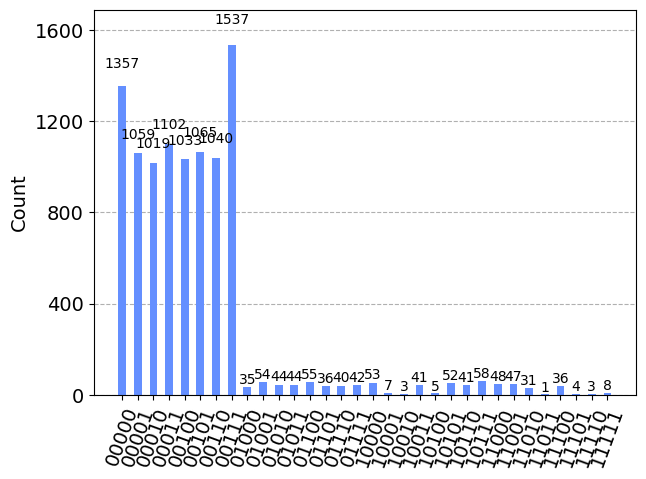

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import AerSimulator

def binary_addition(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grover_oracle():
    qc = QuantumCircuit(7)
    binary_addition(qc)

    # Correct states based on the binary addition logic
    correct_states = ['00000', '00100', '01000', '01110', '10000', '10110', '11010', '11111']

    # All possible states for a 5-qubit system
    all_states = ['{0:05b}'.format(i) for i in range(32)]

    # Get the incorrect states by removing the correct states from all possible states
    incorrect_states = [state for state in all_states if state not in correct_states]

    # Flag the incorrect states
    for state in incorrect_states:
        qc.x([i for i in range(5) if state[i] == '1'])
        qc.mct([0, 1, 2, 3, 4], 6)  # Use the 6th qubit as the target
        qc.x([i for i in range(5) if state[i] == '1'])
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)
    qc.h(nqubits-2)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    return qc

n = 7
grover_circuit = QuantumCircuit(n, 5)  # 5 classical bits for the measurement
grover_circuit.h(list(range(3)))

num_iterations = 2  # Roughly sqrt(2^3) for 3 qubits, we can optimize this if needed
for _ in range(num_iterations):
  grover_circuit = grover_circuit.compose(grover_oracle())
  grover_circuit = grover_circuit.compose(diffuser(7))

grover_circuit.measure(range(5), range(5))

# Execution
simulator = AerSimulator()
compiled_circuit = transpile(grover_circuit, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(result.get_counts(grover_circuit))


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def binary_addition(qc):
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.ccx(0, 1, 4)
    qc.ccx(0, 2, 4)
    qc.ccx(1, 2, 4)

def grover_oracle():
    qc = QuantumCircuit(5)
    binary_addition(qc)

    # Correct states based on the binary addition logic
    correct_states = ['00000', '00110', '01010', '01101', '10010', '10101', '11001', '11111']

    # All possible states for a 5-qubit system
    all_states = ['{0:05b}'.format(i) for i in range(32)]

    # Get the incorrect states by removing the correct states from all possible states
    incorrect_states = [state for state in all_states if state not in correct_states]

    # Use phase inversion to mark the incorrect states
    for state in incorrect_states:
        qc.x([i for i in range(5) if state[i] == '1'])
        qc.z(4)  # Apply Z gate to introduce a phase of -1
        qc.x([i for i in range(5) if state[i] == '1'])

    # Uncompute the binary addition to revert back to the original state
    binary_addition(qc)
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    return qc




num_iterations = 1
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(5))

grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend=backend, shots=10000).result()
counts = result.get_counts()
print(counts)


{'0011000 00010': 1, '1101111 00111': 1, '0001000 10111': 1, '0000000 00001': 3, '1010000 00100': 1, '1010111 11000': 1, '1100010 11010': 1, '0001001 00011': 2, '0000001 00101': 8, '0011000 00100': 2, '1000000 01110': 1, '1011010 00111': 4, '0000000 00011': 4, '1000001 01000': 1, '1010111 00001': 1, '1001000 01000': 6, '0111111 11111': 1, '0011111 11000': 1, '1101001 11110': 1, '0100001 11100': 1, '1011110 11110': 1, '1111001 11100': 1, '1010101 11001': 1, '0001111 10110': 1, '0011010 00110': 2, '1110000 01110': 1, '0011100 01100': 1, '0001001 11010': 1, '1111010 00001': 1, '1110001 01101': 1, '0001101 00101': 2, '1000010 01001': 1, '1001101 00100': 1, '0000111 00011': 1, '0001101 00011': 1, '1101111 10000': 1, '0100011 10011': 1, '0110000 00100': 1, '0000010 00101': 3, '0010100 00110': 6, '0001000 00011': 2, '0000010 00001': 3, '1001011 10101': 1, '1111010 00011': 1, '0001010 01100': 1, '1111100 01101': 1, '1000010 01111': 1, '1100010 00011': 1, '1100010 11001': 1, '0011101 11010': 1,

In [ ]:

N = 2**5  # total number of possible states with 5 qubits
M = 6  # number of incorrect states
optimal_iterations = int(round((np.pi/4)*np.sqrt(N/M)))
n = 5
grover_circuit = QuantumCircuit(n)
grover_circuit.h(list(range(3)))
num_iterations = 2
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(5))

grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend=backend, shots=10000).result()
counts = result.get_counts()
print(counts)
plot_histogram(result.get_counts(grover_circuit))
"""

{'11111 00100': 2, '11000 00101': 4, '11111 00101': 3, '01110 00100': 5, '00111 00010': 2, '01000 00011': 2, '01110 00111': 1, '01011 00110': 2, '01101 00100': 2, '00111 00110': 1, '10000 00001': 3, '01111 00010': 1, '00101 00011': 4, '11111 00010': 3, '10011 00000': 2, '01010 00101': 3, '11001 00001': 4, '01101 00110': 4, '00100 00111': 8, '10101 00111': 3, '11000 00111': 5, '01101 00101': 4, '10111 00110': 7, '10000 00110': 1, '11100 00011': 2, '11010 00010': 5, '11111 00000': 3, '10100 00100': 7, '10101 00010': 2, '00110 00101': 9, '01111 00110': 6, '10010 00110': 4, '00111 00000': 4, '01101 00001': 3, '01111 00101': 2, '10011 00100': 1, '10111 00101': 2, '00101 00111': 3, '10001 00010': 2, '00011 00110': 5, '10111 00011': 6, '01110 00001': 2, '00000 00111': 4, '00001 00000': 4, '01110 00000': 4, '10100 00010': 5, '01010 00110': 4, '10000 00010': 2, '11001 00000': 7, '11110 00111': 4, '11000 00110': 2, '00101 00110': 6, '00100 00000': 6, '11101 00001': 7, '11010 00110': 2, '11101 00

"\nN = 2**5  # total number of possible states with 5 qubits\nM = 6  # number of incorrect states\noptimal_iterations = int(round((np.pi/4)*np.sqrt(N/M)))\nn = 5\ngrover_circuit = QuantumCircuit(n)\ngrover_circuit.h(list(range(3)))\nnum_iterations = 2\nfor _ in range(num_iterations):\n    grover_circuit = grover_circuit.compose(grover_oracle())\n    grover_circuit = grover_circuit.compose(diffuser(5))\n\ngrover_circuit.measure_all()\n\nbackend = Aer.get_backend('qasm_simulator')\nresult = execute(grover_circuit, backend=backend, shots=10000).result()\ncounts = result.get_counts()\nprint(counts)\nplot_histogram(result.get_counts(grover_circuit))\n"

{'00101': 1236, '00001': 1282, '00000': 1267, '00010': 1235, '00100': 1285, '00011': 1213, '00111': 1272, '00110': 1210}


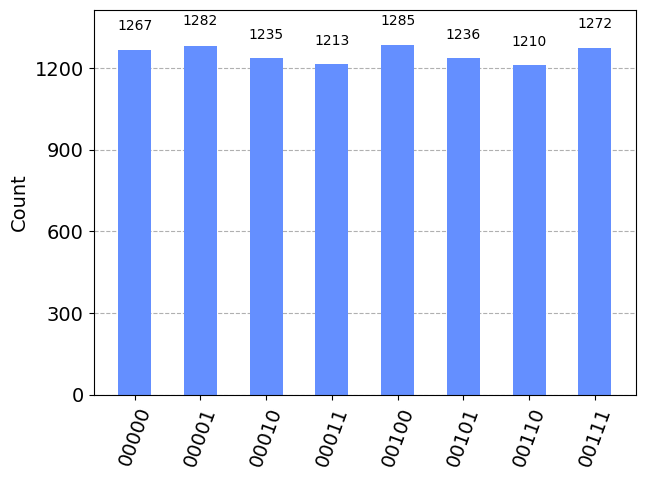

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def binary_addition(qc):
  # Kogge-Stone adder
  qc.cx(0, 3)
  qc.cx(1, 3)
  qc.cx(0, 2)
  qc.cx(0, 1)

def grover_oracle():
  qc = QuantumCircuit(5)
  binary_addition(qc)

  # Correct states based on the binary addition logic
  correct_states = ['00000', '00110', '01010', '01110', '10010', '10110', '11010', '11111']

  # All possible states for a 5-qubit system
  all_states = ['{0:05b}'.format(i) for i in range(32)]

  # Get the incorrect states by removing the correct states from all possible states
  incorrect_states = [state for state in all_states if state not in correct_states]

  # Use phase inversion to mark the incorrect states
  for state in incorrect_states:
    qc.x([i for i in range(5) if state[i] == '1'])
    qc.z(4) # Apply Z gate to introduce a phase of -1
    qc.x([i for i in range(5) if state[i] == '1'])

  # Uncompute the binary addition to revert back to the original state
  binary_addition(qc)
  return qc

def diffuser(nqubits):
  qc = QuantumCircuit(nqubits)
  for qubit in range(nqubits):
    qc.h(qubit)
  for qubit in range(nqubits):
    qc.x(qubit)
  qc.h(nqubits-1)
  qc.cx(list(range(nqubits-1)), nqubits-1) # Toffoli gate
  qc.h(nqubits-1)
  for qubit in range(nqubits):
    qc.x(qubit)
  for qubit in range(nqubits):
    qc.h(qubit)
  return qc

N = 2**5 # total number of possible states with 5 qubits
M = 6 # number of incorrect states
optimal_iterations = int(round((np.pi/4)*np.sqrt(N/M)))
n = 5
grover_circuit = QuantumCircuit(n)
grover_circuit.h(list(range(3)))
num_iterations = 4
for _ in range(num_iterations):
  grover_circuit = grover_circuit.compose(grover_oracle())
  grover_circuit = grover_circuit.compose(diffuser(5))

grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend=backend, shots=10000).result()
counts = result.get_counts()
print(counts)
plot_histogram(result.get_counts(grover_circuit))

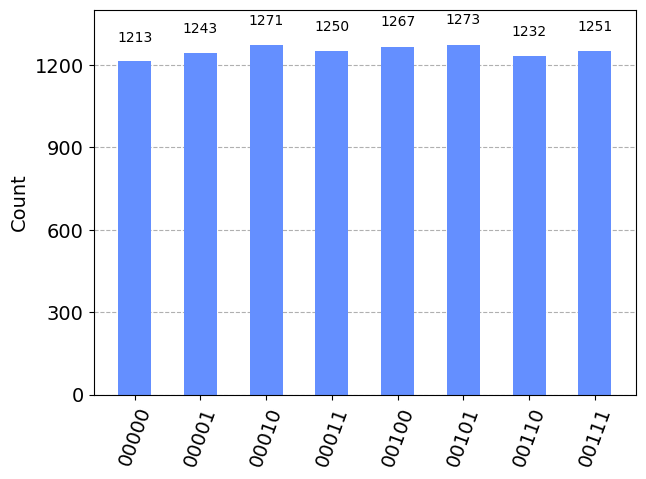

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def oracle():
    qc = QuantumCircuit(6)

    # Patterns using an ancilla qubit for controlled operations:
    # |000|00>
    # |001|10>
    # |010|10>
    # |011|01>
    # |100|10>
    # |101|01>
    # |110|01>
    # |111|11>

    # Marking the incorrect states
    # Handle the states which do not follow the pattern

    # For patterns |001|00>, |001|01>, |001|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |010|00>, |010|01>, |010|11>
    qc.x(1)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |011|00>, |011|10>, |011|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |100|00>, |100|01>, |100|11>
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |101|00>, |101|10>, |101|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |110|00>, |110|10>, |110|11>
    qc.x(1)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For pattern |111|00>, |111|01>, |111|10>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # Uncompute
    qc.x([0, 1, 2])

    gate = qc.to_gate()
    gate.name = "Oracle"
    return gate

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

# Grover's iteration
qc = QuantumCircuit(6, 5)
qc.h([0, 1, 2])  # Initializing input qubits
num_iterations = 5  # Roughly sqrt(2^3) for 3 qubits
for _ in range(num_iterations):
    qc.append(oracle(), [0, 1, 2, 3, 4, 5])
    qc.append(diffuser(3), [0, 1, 2])

qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=10000).result()
plot_histogram(result.get_counts(qc))


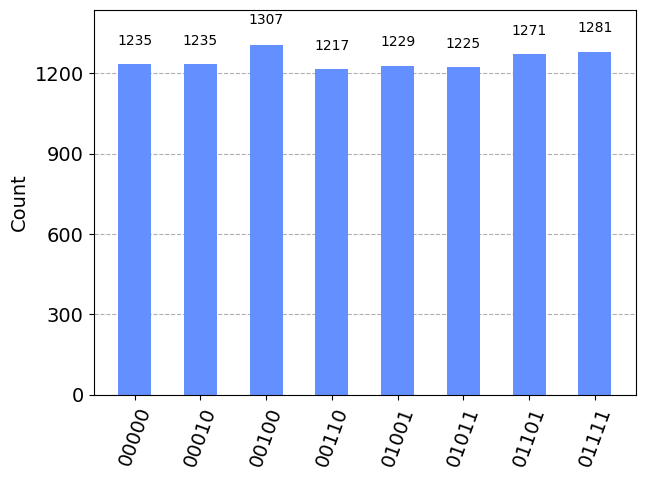

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import numpy as np

def binary_adder(qcirc):
    #qcirc = QuantumCircuit(5)

    # Apply the binary addition logic
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(0, 2)
    qc.cx(0, 1)

def grover_oracle():
    qc = QuantumCircuit(6, name='Oracle')
    binary_adder(qc)

    # Apply controlled-X gates for all incorrect states
    # All states except the correct patterns are considered incorrect
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |010|00>, |010|01>, |010|11>
    qc.x(1)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |011|00>, |011|10>, |011|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |100|00>, |100|01>, |100|11>
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |101|00>, |101|10>, |101|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For patterns |110|00>, |110|10>, |110|11>
    qc.x(1)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # For pattern |111|00>, |111|01>, |111|10>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)

    # Uncompute
    qc.x([0, 1, 2])

    gate = qc.to_gate()
    gate.name = "Oracle"
    return gate

def diffuser():
    diff = QuantumCircuit(6, name='Diffuser')
    diff.h(range(5))
    diff.x(range(5))
    diff.h(4)
    diff.mct([0,1,2,3], 4)
    diff.h(4)
    diff.x(range(5))
    diff.h(range(5))
    return diff

qcirc = QuantumCircuit(6, 2)
qcirc.initialize(np.array([1, -1])/np.sqrt(2), 4)  # Initialize the auxiliary qubit in state |->
qcirc.h([0,1,2,3])

iterations = 4
for _ in range(iterations):
    qcirc.compose(grover_oracle(), inplace=True)
    qcirc.compose(diffuser(), inplace=True)

qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])

# Simulate and plot results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=10000).result()
plot_histogram(result.get_counts(qc))





{'00001': 1239, '00110': 1274, '00100': 1215, '00101': 1262, '00010': 1205, '00000': 1302, '00111': 1264, '00011': 1239}


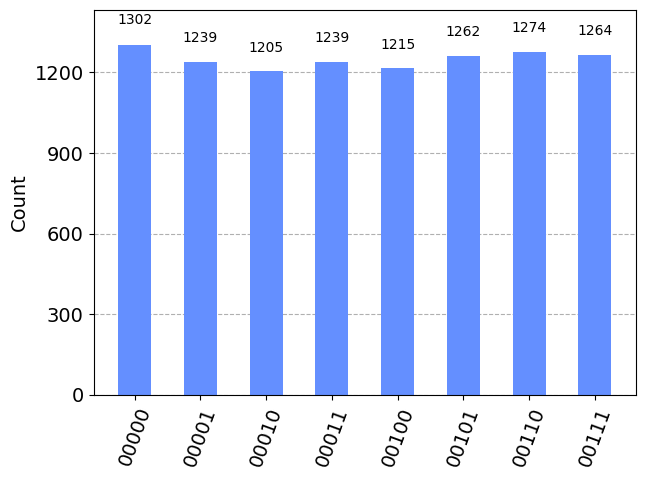

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

def binary_addition(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grover_oracle():
    qc = QuantumCircuit(6)
    binary_addition(qc)

    # Correct states based on the binary addition logic
    correct_states = ['00000', '00110', '01010', '01101', '10010', '10101', '11001', '11111']

    # All possible states for a 5-qubit system
    all_states = ['{0:05b}'.format(i) for i in range(32)]

    # Get the incorrect states by removing the correct states from all possible states
    incorrect_states = [state for state in all_states if state not in correct_states]

    # Apply phase flip for incorrect states
    for state in incorrect_states:
        qc.x([i for i in range(5) if state[i] == '1'])
        qc.z(4)  # Apply Z gate to introduce a phase flip
        qc.x([i for i in range(5) if state[i] == '1'])
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits-1):  # Exclude the last qubit which is the carry
        qc.h(qubit)
    for qubit in range(nqubits-1):
        qc.x(qubit)
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)
    qc.h(nqubits-2)
    for qubit in range(nqubits-1):
        qc.x(qubit)
    for qubit in range(nqubits-1):
        qc.h(qubit)
    return qc

n = 6
grover_circuit = QuantumCircuit(n, 5)  # 5 classical bits for the measurement
grover_circuit.h(list(range(3)))

num_iterations = 2  # Roughly sqrt(2^3) for 3 qubits, we can optimize this if needed
for _ in range(num_iterations):
  grover_circuit = grover_circuit.compose(grover_oracle())
  grover_circuit = grover_circuit.compose(diffuser(6))

grover_circuit.measure(range(5), range(5))

# Execution
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


{'10001': 34, '11000': 37, '01011': 42, '00111': 971, '00011': 1012, '00100': 944, '11010': 47, '00101': 1601, '01001': 39, '00110': 1631, '00001': 984, '10101': 42, '11100': 40, '10010': 32, '00010': 938, '11001': 37, '00000': 982, '10111': 36, '10100': 35, '01010': 36, '10011': 28, '11101': 41, '10110': 51, '01110': 41, '11110': 36, '10000': 49, '01111': 30, '01000': 46, '01100': 42, '01101': 33, '11011': 47, '11111': 36}


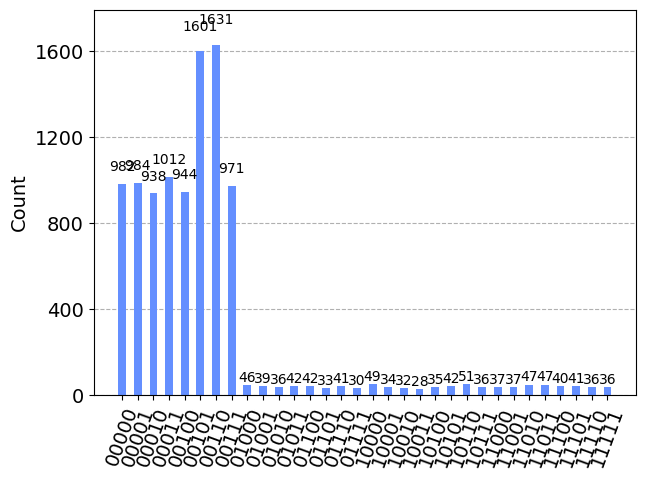

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import AerSimulator

def binary_addition(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grover_oracle():
    qc = QuantumCircuit(6)
    binary_addition(qc)

    # Marking incorrect states
    # For patterns like |001|00>, |001|01>, |001|11> and so on
    patterns = [
        ('001', [3]),
        ('010', [3, 4]),
        ('011', []),
        ('100', [3, 4]),
        ('101', []),
        ('110', []),
        ('111', [3])
    ]

    for pattern, targets in patterns:
        for qubit, bit in enumerate(pattern):
            if bit == '1':
                qc.x(qubit)
        for target in targets:
            qc.mct([0, 1, 2, target], 5)
        for qubit, bit in enumerate(pattern):
            if bit == '1':
                qc.x(qubit)

    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)
    qc.h(nqubits-2)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    return qc

n = 6
grover_circuit = QuantumCircuit(n, 5)  # 5 classical bits for the measurement
grover_circuit.h(list(range(3)))

num_iterations = 2  # Roughly sqrt(2^3) for 3 qubits, we can optimize this if needed
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(6))

grover_circuit.measure(range(5), range(5))

# Execution
simulator = AerSimulator()
compiled_circuit = transpile(grover_circuit, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from math import pi, sqrt
import matplotlib.pyplot as plt

def f_x(qc):
    # Assuming qubits 0, 1, 2 as input bits
    # qubit 3 as sum bit
    # qubit 4 as carry bit
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def sigmoid_approximation(qc, qubit):
    # Apply a Ry gate as a rough approximation to sigmoid
    qc.ry(pi/4, qubit)

def grovers_oracle(qc, auxiliary_qubit):
    # Apply f(x)
    f_x(qc)

    # Compute the sigmoid of the absolute difference
    # Assuming the difference has been stored in qubit 3 (sum qubit)
    sigmoid_approximation(qc, 3)

    # Phase flip based on the auxiliary qubit
    qc.z(auxiliary_qubit)

    # Uncompute f(x) to return to the original state
    f_x(qc)

def diffusion_operator(qc, input_qubits):
    # Apply the Grover's diffusion operator on the input qubits
    qc.h(input_qubits)
    qc.x(input_qubits)
    qc.h(input_qubits[-1])
    qc.mct(input_qubits[:-1], input_qubits[-1])
    qc.h(input_qubits[-1])
    qc.x(input_qubits)
    qc.h(input_qubits)

#def grovers_algorithm():
qc = QuantumCircuit(6, 5)  # 3 qubits for x, 1 for sum, 1 for carry, 1 auxiliary qubit

# Initial state preparation
qc.h([0,1,2])
qc.x(5)
qc.h(5)

# Grover's Oracle and Diffusion operator (repeated for sqrt(N) times, i.e., 2 times for 3 qubits)
for _ in range(4):
    grovers_oracle(qc, 5)
    diffusion_operator(qc, [0,1,2])

# Measurement
qc.measure([0,1,2,3,4], [0,1,2,3,4])

# Execute and plot
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=10000).result()
counts = result.get_counts(qc)
histogram = plot_histogram(counts)
print(result)
print(counts)




Result(backend_name='qasm_simulator', backend_version='0.13.0', qobj_id='', job_id='62ef6f74-03f9-48bc-b824-6ef337919666', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x5': 1216, '0x1': 1246, '0x4': 1234, '0x6': 1254, '0x3': 1238, '0x7': 1263, '0x0': 1268, '0x2': 1281}), header=QobjExperimentHeader(creg_sizes=[['c', 5]], global_phase=1.102182119232618e-15, memory_slots=5, n_qubits=6, name='circuit-285', qreg_sizes=[['q', 6]], metadata={}), status=DONE, seed_simulator=1395109653, metadata={'time_taken': 0.06547464, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[4, 4], [3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 5, 'sample_measure_time': 0.00477339, 'active_input_qubits': [0, 1, 2, 3, 4], 'num_clbits': 5, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12982, 'noise': 'ideal',

{'10010': 100, '10011': 70, '01101': 83, '01111': 246, '00100': 731, '00101': 742, '11010': 223, '01001': 69, '10001': 70, '01110': 223, '01100': 230, '01000': 100, '00010': 740, '00110': 712, '00001': 673, '11100': 220, '10101': 89, '10000': 97, '00000': 715, '11001': 231, '11110': 261, '00011': 760, '00111': 705, '11000': 265, '11011': 265, '11111': 243, '11101': 234, '10111': 257, '10100': 231, '01011': 63, '10110': 268, '01010': 84}


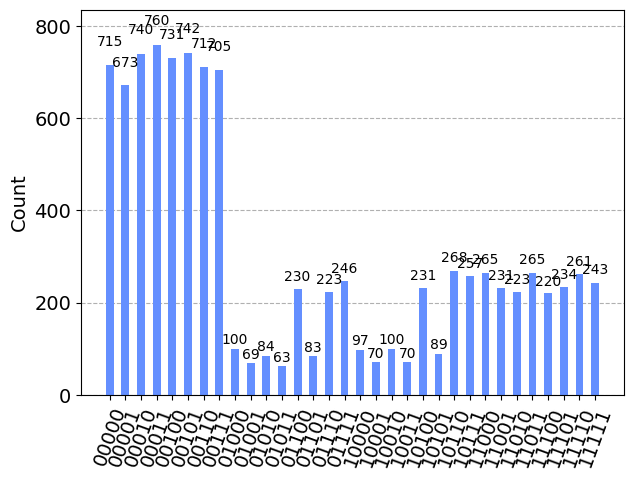

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

def binary_addition(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grover_oracle():
    qc = QuantumCircuit(6)
    binary_addition(qc)

    # For patterns |001|00>, |001|01>, |001|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)

    # For patterns |010|00>, |010|01>, |010|11>
    qc.x(1)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(1)

    # For patterns |011|00>, |011|10>, |011|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)

    # For patterns |100|00>, |100|01>, |100|11>
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(2)

    # For patterns |101|00>, |101|10>, |101|11>
    qc.x(0)
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)
    qc.x(2)

    # For patterns |110|00>, |110|10>, |110|11>
    qc.x(1)
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(1)
    qc.x(2)

    # For pattern |111|00>, |111|01>, |111|10>
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)
    qc.x(1)
    qc.x(2)

    # Introduce a phase flip for the marked states
    qc.z(5)

    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)
    qc.h(nqubits-2)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    return qc

n = 6
grover_circuit = QuantumCircuit(n, 5)  # 5 classical bits for the measurement
grover_circuit.h(list(range(3)))

num_iterations = 2  # Roughly sqrt(2^3) for 3 qubits, we can optimize this if needed
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(6))

grover_circuit.measure(range(5), range(5))

# Execution
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


In [ ]:
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.visualization import plot_histogram

def f_x_with_error(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)
    qc.cx(3,4)  # Introducing the error

def f_x_without_error(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grovers_oracle(qc):
    f_x_with_error(qc)  # Erroneous adder
    f_x_without_error(qc)  # Correct adder

    # Check if the results from f_x_with_error and f_x_without_error are different
    qc.cx(3, 6)
    qc.cx(4, 6)

    # Implementing phase kickback using the auxiliary qubit
    qc.cz(6,7)  # Z-gate to flip the phase

    # Undo the operations to return back
    qc.cx(4, 6)
    qc.cx(3, 6)

    f_x_without_error(qc)  # Uncompute the correct adder

def diffusion_operator(qc):
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.h(2)
    qc.mct([0,1], 2)
    qc.h(2)
    qc.x([0,1,2])
    qc.h([0,1,2])

def grovers_algorithm():
    qc = QuantumCircuit(8, 3)  # Added another auxiliary qubit

    # Initial state preparation
    qc.h([0,1,2])
    qc.x(7)
    qc.h(7)  # Prepare the auxiliary qubit in (|0⟩-|1⟩)/√2 state
    qc.barrier()

    # Grover's Oracle and Diffusion operator
    for _ in range(2):
        grovers_oracle(qc)
        qc.barrier()
        diffusion_operator(qc)
        qc.barrier()

    # Measurement
    qc.measure([0,1,2], [0,1,2])

    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=10000).result()
    counts = result.get_counts(qc)
    plot_histogram(result.get_counts(qc)).show()
    print(counts)
    plot_histogram(counts)

grovers_algorithm()


{'001': 951, '100': 1013, '110': 950, '111': 2177, '011': 893, '010': 917, '000': 2162, '101': 937}


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def f_x_with_error(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)
    qc.cx(3,4)  # Introducing the error

def f_x_without_error(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grovers_oracle(qc):
    f_x_with_error(qc)  # Erroneous adder
    f_x_without_error(qc)  # Correct adder

    # Check if the results from f_x_with_error and f_x_without_error are different
    qc.cx(3, 6)
    qc.cx(4, 6)

    # Implementing phase kickback using the auxiliary qubit
    qc.cz(6,7)  # Z-gate to flip the phase

    # Undo the operations to return back
    qc.cx(4, 6)
    qc.cx(3, 6)

    f_x_without_error(qc)  # Uncompute the correct adder

def diffusion_operator(qc):
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.h(2)
    qc.mct([0,1], 2)
    qc.h(2)
    qc.x([0,1,2])
    qc.h([0,1,2])

def grovers_algorithm():
    qc = QuantumCircuit(8, 3)  # Added another auxiliary qubit

    # Initial state preparation
    qc.h([0,1,2])
    qc.x(7)
    qc.h(7)  # Prepare the auxiliary qubit in (|0⟩-|1⟩)/√2 state
    qc.barrier()

    # Grover's Oracle and Diffusion operator
    for _ in range(2):
        grovers_oracle(qc)
        qc.barrier()
        diffusion_operator(qc)
        qc.barrier()

    # Measurement
    qc.measure([0,1,2], [0,1,2])

    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=10000).result()
    plot_histogram(result.get_counts(qc)).show()
    print(result.get_counts(qc))

grovers_algorithm()


{'100': 1013, '110': 897, '101': 959, '001': 947, '010': 944, '000': 2196, '011': 936, '111': 2108}


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Define the erroneous adder function
def f_x_with_error(qc):
    # Erroneous sum calculation
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    # Erroneous carry calculation
    qc.ccx(0, 1, 4)
    qc.ccx(0, 2, 4)
    qc.ccx(1, 2, 4)
    # Introduce an error
    qc.cx(3, 4)  # Flip the carry bit to introduce an error

# Define the correct adder function
def f_x_without_error(qc):
    # Correct sum calculation
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    # Correct carry calculation
    qc.ccx(0, 1, 4)
    qc.ccx(0, 2, 4)
    qc.ccx(1, 2, 4)

# Define Grover's oracle
def grovers_oracle(qc):
    # Apply the erroneous adder function
    f_x_with_error(qc)
    # Copy the erroneous results to ancilla qubits (using qubits 5 and 6 as ancillas)
    qc.cx(3, 5)
    qc.cx(4, 6)

    # Apply the correct adder function
    f_x_without_error(qc)
    # Apply controlled-Z to the ancilla qubits if the results are different
    qc.cx(3, 5)
    qc.cx(4, 6)
    qc.ccz(5, 6, 7)

    # Uncompute the correct adder to return the sum and carry qubits to their original state
    f_x_without_error(qc)
    # Reset the ancilla qubits
    qc.cx(3, 5)
    qc.cx(4, 6)

    # Flip the auxiliary qubit if the ancilla qubits are in the |11> state
    # This implements the phase kickback which marks the incorrect states
    qc.ccx(5, 6, 7)

# Define the diffusion operator (inversion about the mean)
def diffusion_operator(qc):
    # Apply transformation |s> -> |00...0> (H-gates)
    qc.h([0, 1, 2])
    # Apply transformation |00...0> -> |11...1> (X-gates)
    qc.x([0, 1, 2])
    # Do multi-controlled-Z gate
    qc.h(2)
    qc.mct([0, 1], 2)  # Multi-controlled Toffoli gate with qubits 0,1 as controls and 2 as target
    qc.h(2)
    # Apply transformation |11...1> -> |00...0>
    qc.x([0, 1, 2])
    # Apply transformation |00...0> -> |s>
    qc.h([0, 1, 2])

# Put it all together to define Grover's algorithm
def grovers_algorithm():
    # Initialize a quantum circuit with 8 qubits (3 for the adder inputs, 1 for sum, 1 for carry, 2 for ancilla, and 1 for phase flip) and 3 classical bits for measurement
    qc = QuantumCircuit(8, 3)

    # Prepare the initial state with a superposition of all input qubits and the phase qubit set to (|0> - |1>)/sqrt(2)
    qc.h([0, 1, 2])
    qc.x(7)
    qc.h(7)

    # Apply a barrier for visualization purposes
    qc.barrier()

    # Apply Grover's oracle and the diffusion operator for a number of times optimal for our search problem
    iterations = 2
    for _ in range(iterations):
        grovers_oracle(qc)
        qc.barrier()
        diffusion_operator(qc)
        qc.barrier()

    # Measure the input qubits to extract the result
    qc.measure([0, 1, 2], [0, 1, 2])

    # Execute the quantum circuit on a simulator
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=1024).result()

    # Print the result counts
    counts = result.get_counts(qc)
    print(counts)

    # Plot the histogram of the

grovers_algorithm();

<ipython-input-4-59f7b8f84a53>:61: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1], 2)  # Multi-controlled Toffoli gate with qubits 0,1 as controls and 2 as target


{'001': 73, '100': 77, '101': 81, '110': 110, '000': 261, '010': 80, '011': 84, '111': 258}


<ipython-input-15-1aaf43c09803>:56: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits[:-1], qubits[-1])  # Multi-controlled Toffoli gate


{'100': 12, '110': 198, '001': 16, '101': 185, '111': 159, '011': 228, '010': 10, '000': 216}


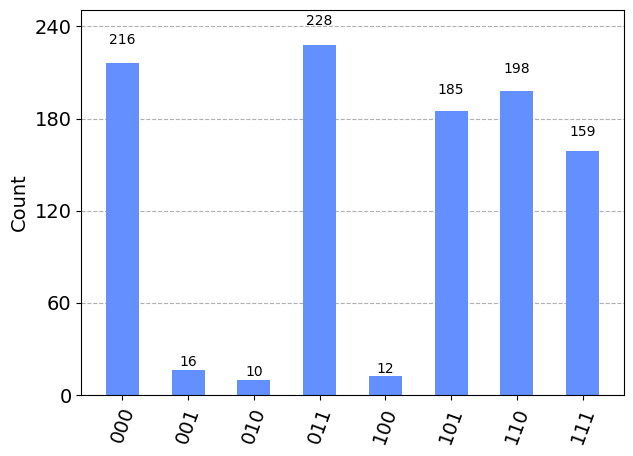

In [ ]:
import math
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def f_x_with_error(qc):
    # Apply the erroneous adder
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)
    qc.cx(3,4)  # Introduce an error

def apply_inverse_erroneous_adder(qc):
    # This function applies the inverse of the erroneous adder
    qc.cx(3,4)
    qc.ccx(1,2,4)
    qc.ccx(0,2,4)
    qc.ccx(0,1,4)
    qc.cx(2,3)
    qc.cx(1,3)
    qc.cx(0,3)

def grovers_oracle(qc):
    # Apply the erroneous adder
    f_x_with_error(qc)
    qc.barrier()

    # Apply the correct adder. This will uncompute the correct adder if there is no error.
    f_x_without_error(qc)
    qc.barrier()

    # Use an auxiliary qubit to mark whether the sum or carry has an error
    # By comparing the output of the erroneous and correct adders.
    qc.cx(3, 5)
    qc.cx(4, 5)

    # Apply a phase flip using the 5th qubit where the comparison result is stored
    qc.cz(5, 6)

    # Uncompute the auxiliary qubit to reset it for the next iteration
    qc.cx(4, 5)
    qc.cx(3, 5)
    qc.barrier()

    # Apply the inverse of the erroneous adder
    apply_inverse_erroneous_adder(qc)
    qc.barrier()

def diffusion_operator(qc, qubits):
    # Apply the diffusion operator
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # Multi-controlled Toffoli gate
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

def grovers_algorithm():
    # Initialize a quantum circuit with 7 qubits and 3 classical bits
    qc = QuantumCircuit(7, 3)

    # Prepare the initial state with Hadamard gates on input qubits
    qc.h([0, 1, 2])

    # Prepare the auxiliary qubit in the (|0⟩-|1⟩)/√2 state
    qc.x(6)
    qc.h(6)

    # Calculate the optimal number of iterations
    #N = 2**3  # Total number of states
    #M = 4     # Number of solutions to find (incorrect states)
    #optimal_iterations = math.floor((math.pi / 4) * math.sqrt(N/M))

    num_iterations = 1  # Adjust based on the formula or through experimentation
    for _ in range(num_iterations):
        grovers_oracle(qc)
        qc.barrier()
        diffusion_operator(qc, [0, 1, 2, 6])
        qc.barrier()

    # Measure the input qubits
    qc.measure([0, 1, 2], [0, 1, 2])

    # Execute the circuit on the QASM simulator
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=1024).result()
    counts = result.get_counts(qc)
    return counts

# Run the algorithm and print the results
counts = grovers_algorithm()
print(counts)
plot_histogram(counts)



<ipython-input-20-8e1034e3b480>:9: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1], 2)  # multi-controlled Toffoli with controls on qubits 0, 1 and target on qubit 2
<ipython-input-20-8e1034e3b480>:19: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits[:-1], qubits[-1])  # multi-controlled Toffoli on all qubits except the last


{'110': 3, '101': 4, '100': 5, '011': 5, '111': 8, '001': 5, '010': 9, '000': 985}


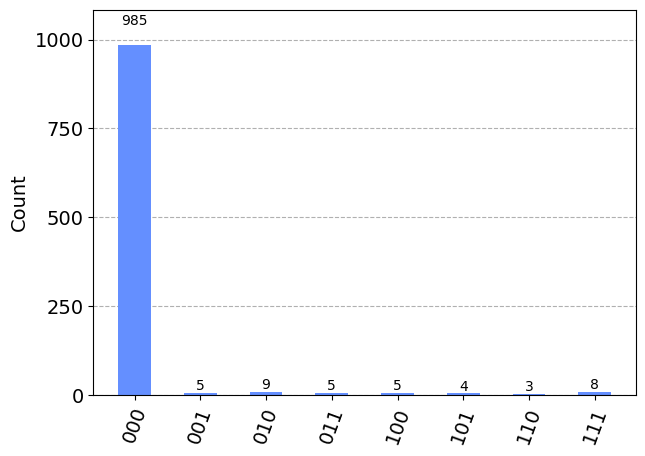

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Oracle for marking the incorrect states
def grovers_oracle(qc):
    # Apply X gates to qubits 0, 1, 2 to prepare for multi-controlled Z on the incorrect states
    qc.x([0, 1, 2])
    qc.h(2)
    qc.mct([0, 1], 2)  # multi-controlled Toffoli with controls on qubits 0, 1 and target on qubit 2
    qc.h(2)
    qc.x([0, 1, 2])
    qc.barrier()

# Diffusion operator (inversion about the mean)
def diffusion_operator(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # multi-controlled Toffoli on all qubits except the last
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

# Grover's algorithm
def grovers_algorithm():
    # Create a quantum circuit with 3 qubits and 3 classical bits
    qc = QuantumCircuit(3, 3)

    # Apply Hadamard gates to all qubits to create an equal superposition of all states
    qc.h([0, 1, 2])
    qc.barrier()

    # Number of iterations: typically sqrt(N), where N is the number of states
    # For 3 qubits, sqrt(2^3) = sqrt(8) ≈ 2-3 iterations should suffice
    for _ in range(2):
        grovers_oracle(qc)
        diffusion_operator(qc, [0, 1, 2])
        qc.barrier()

    # Measurement of all qubits
    qc.measure([0, 1, 2], [0, 1, 2])

    return qc

# Execute the Grover's algorithm and display the results
qc = grovers_algorithm()
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


<ipython-input-21-c69205c15fcf>:11: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1], 2)
<ipython-input-21-c69205c15fcf>:23: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1], 2)
<ipython-input-21-c69205c15fcf>:35: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits[:-1], qubits[-1])  # multi-controlled Toffoli


{'100': 510, '011': 514}


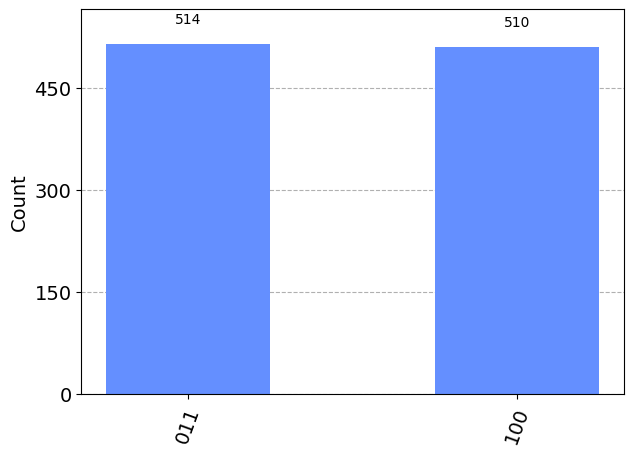

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Define the erroneous oracle
def grovers_oracle(qc):
    # Flip the incorrect |001⟩, |010⟩, |100⟩ states to |111⟩
    qc.x(0)
    qc.x(1)
    # Flip the phase of |111⟩ (which now represents the incorrect states)
    qc.h(2)
    qc.mct([0, 1], 2)
    qc.h(2)
    # Uncompute the state back to original
    qc.x(1)
    qc.x(0)

    qc.barrier()

    # Flip the incorrect |111⟩ state
    qc.x(2)
    # Flip the phase of |111⟩
    qc.h(2)
    qc.mct([0, 1], 2)
    qc.h(2)
    # Uncompute the state back to original
    qc.x(2)

    qc.barrier()

# Define the Grover diffusion operator
def diffusion_operator(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # multi-controlled Toffoli
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

# Define the Grover's algorithm
def grovers_algorithm():
    qc = QuantumCircuit(3, 3)  # We only need 3 qubits and 3 classical bits

    # Initial state preparation (|s⟩)
    qc.h([0, 1, 2])

    # Grover's Oracle and Diffusion operator
    iterations = 1  # With 4 states, 1 iteration is theoretically optimal
    for _ in range(iterations):
        grovers_oracle(qc)
        diffusion_operator(qc, [0, 1, 2])

    # Measurement
    qc.measure([0, 1, 2], [0, 1, 2])

    # Execute the quantum circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=1024).result()
    counts = result.get_counts(qc)
    return counts

# Run Grover's algorithm and print the results
counts = grovers_algorithm()
print(counts)
plot_histogram(counts)


<ipython-input-24-7375fe6a40d8>:41: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits[:-1], qubits[-1])


{'101': 98, '010': 99, '000': 97, '110': 90, '100': 180, '001': 102, '011': 187, '111': 171}


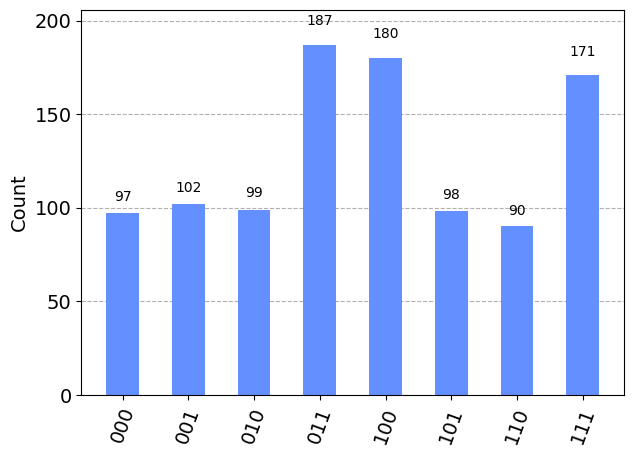

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Correct adder function
def adder(qc):
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.ccx(0, 1, 4)
    qc.ccx(2, 3, 4)

# Oracle for marking incorrect sums
def grovers_oracle(qc):
    # Apply the adder
    adder(qc)

    # Apply phase flip to incorrect states
    # We use an ancillary qubit (qubit 5) to help identify the correct sums
    # This ancilla qubit will be flipped if the state is an incorrect sum and then used for phase kickback
    qc.x([3, 4])
    qc.ccx(3, 4, 5)
    qc.x([3, 4])

    # Apply phase kickback
    qc.cz(5, 6)

    # Uncompute the ancilla qubit state
    qc.x([3, 4])
    qc.ccx(3, 4, 5)
    qc.x([3, 4])

    # Uncompute the adder to restore the original state of the qubits
    adder(qc)

# Diffusion operator
def diffusion_operator(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

# Grover's algorithm
def grovers_algorithm():
    qc = QuantumCircuit(7, 3)

    # Prepare the auxiliary qubits
    qc.x(6)
    qc.h(6)

    # Initialize qubits in superposition
    qc.h([0, 1, 2])
    qc.barrier()

    # Apply Grover's iterations
    iterations = 2
    for i in range(iterations):
        grovers_oracle(qc)
        qc.barrier()
        diffusion_operator(qc, [0, 1, 2])
        qc.barrier()

    # Measurement
    qc.measure([0, 1, 2], [0, 1, 2])

    # Execute the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=1024).result()
    counts = result.get_counts(qc)
    return counts

# Run the algorithm and display the results
counts = grovers_algorithm()
print(counts)
plot_histogram(counts)
#plt.show()


<ipython-input-26-76dc87c63a8c>:61: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits[:-1], qubits[-1])  # Multi-controlled Toffoli


{'101': 92, '100': 91, '001': 86, '110': 109, '010': 105, '000': 201, '011': 94, '111': 246}


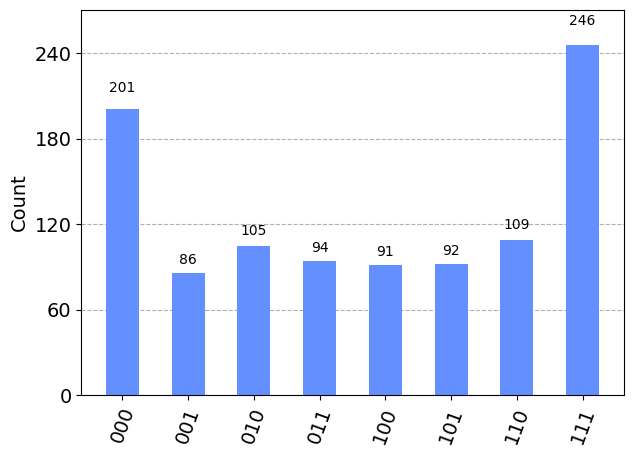

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Correct adder function
def adder_without_error(qc):
    # This is a simplified representation of a binary adder
    # It assumes that q3 and q4 are initially cleared (set to 0)
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.ccx(0, 1, 4)
    qc.ccx(1, 2, 4)
    qc.ccx(0, 2, 4)

# Erroneous adder function (introduces error)
def adder_with_error(qc):
    # This erroneous adder may flip additional bits, resulting in incorrect states
    # Introducing an error by wrongly flipping q3 and q4 under certain conditions
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.ccx(0, 1, 4)
    qc.ccx(1, 2, 4)
    qc.ccx(0, 2, 4)
    # Introduce an error, for example, by flipping q4 when it shouldn't
    qc.x(4)  # Erroneous operation

# Oracle to mark incorrect states
def grovers_oracle(qc):
    # Apply the correct adder
    adder_without_error(qc)
    # Copy the result to ancillary qubits to compare later
    qc.cx(3, 5)
    qc.cx(4, 6)

    # Uncompute to return the data qubits to their original state
    adder_without_error(qc)

    # Apply the erroneous adder
    adder_with_error(qc)

    # Compare results from the correct and erroneous adder using ancillary qubits
    # Any difference would flip the ancilla (q7), marking the state
    qc.cx(3, 5)
    qc.cx(4, 6)
    qc.ccx(5, 6, 7)

    # Uncompute the ancillary qubits
    qc.cx(4, 6)
    qc.cx(3, 5)

    # Uncompute the erroneous adder to reset the sum and carry qubits
    adder_with_error(qc)

# Diffusion operator (inversion about the mean)
def diffusion_operator(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # Multi-controlled Toffoli
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

# Grover's algorithm
def grovers_algorithm():
    qc = QuantumCircuit(8, 3)  # 5 data qubits, 3 ancilla, 3 for measurement

    # Initialize qubits in superposition
    qc.h([0, 1, 2])

    # Prepare the ancillary qubit (q7) in state |-⟩ for phase kickback
    qc.x(7)
    qc.h(7)

    # Apply Grover's iterations
    iterations = 1  # Number of iterations can be adjusted
    for i in range(iterations):
        grovers_oracle(qc)
        diffusion_operator(qc, [0, 1, 2])

    # Measurement of the data qubits
    qc.measure([0, 1, 2], [0, 1, 2])

    # Execute the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=1024).result()
    counts = result.get_counts(qc)
    return counts

# Run the algorithm
counts = grovers_algorithm()
print(counts)
plot_histogram(counts)
#plt.show()


Testing Correct Adder:
Input: 000, Statevector: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))
Input: 001, Statevector: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))
Input: 010, Statevector: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,

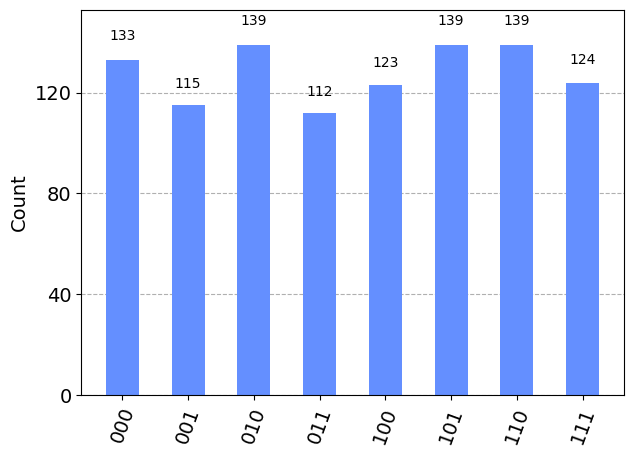

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import ZGate, XGate
from qiskit.quantum_info import Statevector


def correct_adder(qc, a, b, sum_q, carry_q):
    # Implementing a simple full adder
    qc.cx(a, sum_q)
    qc.cx(b, sum_q)
    qc.ccx(a, b, carry_q)

def erroneous_adder(qc, a, b, sum_q, carry_q):
    # Introducing an error in the adder
    qc.cx(a, sum_q)
    # This erroneous adder intentionally skips the second cx gate to simulate an error
    qc.ccx(a, b, carry_q)

def grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit):
    # Apply the correct adder
    for i in range(len(input_qubits) - 1):
        correct_adder(qc, input_qubits[i], input_qubits[i + 1], correct_sum_qubits[i], correct_sum_qubits[-1])
    qc.barrier()

    # Apply the erroneous adder
    for i in range(len(input_qubits) - 1):
        erroneous_adder(qc, input_qubits[i], input_qubits[i + 1], erroneous_sum_qubits[i], erroneous_sum_qubits[-1])
    qc.barrier()

    # Compare the results of the correct and erroneous adders and flag the incorrect states
    for c, e, a in zip(correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits):
        qc.cx(c, a)
        qc.cx(e, a)
    qc.mcx(ancilla_qubits, marker_qubit)

    # Uncompute the comparison to disentangle the ancilla qubits
    for c, e, a in zip(correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits):
        qc.cx(e, a)
        qc.cx(c, a)
    qc.barrier()

    # Uncompute the adders
    for i in reversed(range(len(input_qubits) - 1)):
        correct_adder(qc, input_qubits[i], input_qubits[i + 1], correct_sum_qubits[i], correct_sum_qubits[-1])
    for i in reversed(range(len(input_qubits) - 1)):
        erroneous_adder(qc, input_qubits[i], input_qubits[i + 1], erroneous_sum_qubits[i], erroneous_sum_qubits[-1])

def diffusion_operator(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # multi-controlled Toffoli
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

def grovers_algorithm():
    input_qubits = [0, 1, 2]
    correct_sum_qubits = [3, 4, 5]  # Includes a carry bit
    erroneous_sum_qubits = [6, 7, 8]  # Includes a carry bit
    ancilla_qubits = [9, 10, 11]  # Ancillas for comparison
    marker_qubit = 12  # The qubit that gets its phase flipped

    # Total qubits = 3 (input) + 3 (correct sum) + 3 (erroneous sum) + 3 (ancilla) + 1 (marker)
    qc = QuantumCircuit(13, 3)

    # Initialize input qubits in superposition
    qc.h(input_qubits)

    # Initialize the marker qubit in the |-> state
    qc.x(marker_qubit)
    qc.h(marker_qubit)

    # Apply Grover's Oracle
    grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit)
    qc.barrier()

    # Apply the diffusion operator
    diffusion_operator(qc, input_qubits)
    qc.barrier()

    # Measurement of the input qubits
    qc.measure(input_qubits, range(len(input_qubits)))

    return qc

# Function to test an adder
def test_adder(adder, name):
    print(f"Testing {name}:")
    for input_state in range(8):  # Testing for all 3-bit input states
        bin_state = format(input_state, '03b')
        qc = QuantumCircuit(5)  # Use a circuit with the number of qubits your adder needs
        # Initialize the qubits based on the input state
        for qubit, bit in enumerate(reversed(bin_state)):
            if bit == '1':
                qc.x(qubit)
        # Apply the adder
        adder(qc, 0, 1, 3, 4)
        # Simulate and print the result
        sv = Statevector.from_instruction(qc)
        print(f"Input: {bin_state}, Statevector: {sv}")

def test_oracle():
    print("Testing Oracle:")
    # Initialize a quantum circuit with 13 qubits
    qc = QuantumCircuit(13, 3)  # Assuming 3 qubits will be measured, with corresponding classical bits

    # Input qubits for the adders
    input_qubits = [0, 1, 2]
    correct_sum_qubits = [3, 4, 5]  # Includes a carry bit
    erroneous_sum_qubits = [6, 7, 8]  # Includes a carry bit
    ancilla_qubits = [9, 10, 11]  # Ancillas for comparison
    marker_qubit = 12  # The qubit that gets its phase flipped

    # Initialize input qubits in superposition for testing
    qc.h(input_qubits)

    # Initialize ancilla qubits to zero if necessary
    for ancilla in ancilla_qubits:
        qc.reset(ancilla)  # Reset ancilla qubits to zero

    # Apply the correct adder and get the statevector
    for i in range(len(input_qubits) - 1):
        correct_adder(qc, input_qubits[i], input_qubits[i + 1], correct_sum_qubits[i], correct_sum_qubits[-1])
    sv_correct = Statevector.from_instruction(qc)
    print("Statevector after correct adder:")
    print(sv_correct)

    # Apply the erroneous adder and get the statevector
    for i in range(len(input_qubits) - 1):
        erroneous_adder(qc, input_qubits[i], input_qubits[i + 1], erroneous_sum_qubits[i], erroneous_sum_qubits[-1])
    sv_erroneous = Statevector.from_instruction(qc)
    print("Statevector after erroneous adder:")
    print(sv_erroneous)

    # Initialize the marker qubit in the |-> state
    qc.x(marker_qubit)
    qc.h(marker_qubit)

    # Apply the oracle
    grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit)
    sv_oracle = Statevector.from_instruction(qc)
    print("Statevector after oracle:")
    print(sv_oracle)

    # Check for states with negative amplitude to see which have been marked by the oracle
    negative_amplitude_states = [(i, amp) for i, amp in enumerate(sv_oracle) if amp < 0]
    for state, amplitude in negative_amplitude_states:
        binary_state = format(state, '013b')
        print(f"State {binary_state}: Amplitude = {amplitude}")

    # Assuming you want to measure the first three qubits [0, 1, 2]
    qc.measure(input_qubits, range(3))

    return qc



def test_diffusion():
    print("Testing Diffusion Operator:")
    qc = QuantumCircuit(3)  # Use a circuit with the number of qubits for the diffusion operator
    qc.h([0, 1, 2])  # Initialize qubits in superposition
    diffusion_operator(qc, [0, 1, 2])  # Apply the diffusion operator
    # Simulate and print the result
    sv = Statevector.from_instruction(qc)
    print(f"Statevector after Diffusion: {sv}")

test_adder(correct_adder, "Correct Adder")
test_adder(erroneous_adder, "Erroneous Adder")
test_oracle()
test_diffusion()

# Run the algorithm
qc = grovers_algorithm()
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)



After applying Grover's Oracle:
Statevector:
Statevector([0.25+0.j, 0.  +0.j, 0.  +0.j, ..., 0.  +0.j, 0.  +0.j,
             0.  +0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

After Iteration 1:
Statevector:
Statevector([ 0.1875+0.j, -0.0625+0.j, -0.0625+0.j, ...,  0.    +0.j,
              0.    +0.j,  0.    +0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

After applying Grover's Oracle:
Statevector:
Statevector([0.1875+0.j, 0.125 +0.j, 0.125 +0.j, ..., 0.    +0.j,
             0.    +0.j, 0.    +0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

After Iteration 2:
Statevector:
Statevector([-0.125 +0.j, -0.1875+0.j, -0.1875+0.j, ...,  0.    +0.j,
              0.    +0.j,  0.    +0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))



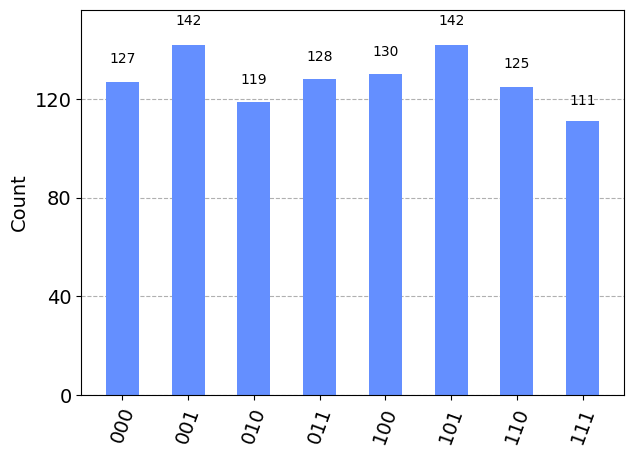

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from math import sqrt, pi

# Full adder for correct calculation
def correct_adder(qc, a, b, cin, sum_q, carry_q):
    # Half adder
    qc.cx(a, sum_q)
    qc.cx(b, sum_q)
    qc.ccx(a, b, carry_q)
    # Account for cin
    qc.cx(cin, sum_q)
    qc.ccx(a, cin, carry_q)
    qc.ccx(b, cin, carry_q)

# Erroneous full adder with intentional error
def erroneous_adder(qc, a, b, cin, sum_q, carry_q):
    # Intentional error: does not consider 'cin' for the sum
    qc.cx(a, sum_q)
    qc.cx(b, sum_q)
    # Still produces the correct carry
    qc.ccx(a, b, carry_q)
    qc.ccx(a, cin, carry_q)
    qc.ccx(b, cin, carry_q)


def debug_statevector(qc, message):
    """ Function to print the statevector for debugging purposes. """
    sv = Statevector.from_instruction(qc)
    print(f"{message}:\nStatevector:\n{sv}\n")

# Grover's Oracle function
def grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit):
    # Apply the correct adder
    correct_adder(qc, input_qubits[0], input_qubits[1], input_qubits[2], correct_sum_qubits[0], correct_sum_qubits[1])
    qc.barrier()

    # Apply the erroneous adder
    erroneous_adder(qc, input_qubits[0], input_qubits[1], input_qubits[2], erroneous_sum_qubits[0], erroneous_sum_qubits[1])
    qc.barrier()

    # Compare the results of the correct and erroneous adders and flag the incorrect states
    qc.cx(correct_sum_qubits[0], ancilla_qubits[0])
    qc.cx(erroneous_sum_qubits[0], ancilla_qubits[0])
    qc.cx(correct_sum_qubits[1], ancilla_qubits[1])
    qc.cx(erroneous_sum_qubits[1], ancilla_qubits[1])
    qc.ccx(ancilla_qubits[0], ancilla_qubits[1], marker_qubit)

    # Uncompute the comparison to disentangle the ancilla qubits
    qc.cx(correct_sum_qubits[1], ancilla_qubits[1])
    qc.cx(erroneous_sum_qubits[1], ancilla_qubits[1])
    qc.cx(correct_sum_qubits[0], ancilla_qubits[0])
    qc.cx(erroneous_sum_qubits[0], ancilla_qubits[0])
    qc.barrier()
    debug_statevector(qc, "After applying Grover's Oracle")

# Diffusion operator (inversion about the mean)
def diffusion_operator(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # multi-controlled Toffoli
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

# Main Grover's algorithm function
def grovers_algorithm(num_iterations=None):
    input_qubits = [0, 1, 2]
    correct_sum_qubits = [3, 4, 5]  # Includes a carry bit
    erroneous_sum_qubits = [6, 7, 8]  # Includes a carry bit
    ancilla_qubits = [9, 10, 11]  # Ancillas for comparison
    marker_qubit = 12  # The qubit that gets its phase flipped

    # Total qubits = 13, total classical bits = 3 (to measure the input qubits)
    qc = QuantumCircuit(13, 3)

    # Initialize input qubits in superposition
    qc.h(input_qubits)

    # Initialize the marker qubit in the |-> state
    qc.x(marker_qubit)
    qc.h(marker_qubit)

    if num_iterations is None:
        # Default heuristic for number of iterations
        num_iterations = int(pi / 4 * sqrt(2**len(input_qubits)))

    for i in range(num_iterations):
        # Apply Grover's Oracle
        grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit)
        qc.barrier()

        # Apply the diffusion operator
        diffusion_operator(qc, input_qubits)
        qc.barrier()

        # Debug after each iteration
        debug_statevector(qc, f"After Iteration {i+1}")

    # Measurement of the input qubits
    qc.measure(input_qubits, range(len(input_qubits)))

    return qc

# Call the Grover's algorithm function and execute the circuit
grover_circuit = grovers_algorithm()
backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)
plot_histogram(counts)


Debugging correct adder...
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Debugging erroneous adder...
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
Debugging Grover's Oracle marking...
State after oracle:
Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, ..., 0.  +0.j, 0.  +0.j,
             0.  +0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))
Results from Grover's Algorithm:
{'001': 120, '101': 137, '010': 121, '000': 125, '110': 135, '100': 119, '011': 143, '111': 124}


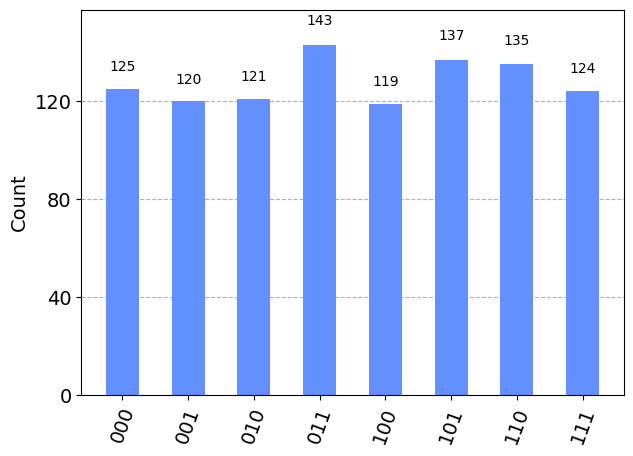

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from math import pi, sqrt
from qiskit.circuit.library.standard_gates import MCXGate
from qiskit.quantum_info import Statevector

def correct_adder(qc, a, b, sum_q, carry_q):
    qc.cx(a, sum_q)
    qc.cx(b, sum_q)
    qc.ccx(a, b, carry_q)

def erroneous_adder(qc, a, b, sum_q, carry_q):
    qc.cx(a, sum_q)
    # This erroneous adder intentionally skips the second cx gate to simulate an error
    qc.ccx(a, b, carry_q)

def debug_adder(input_state, adder_function):
    # Initialize a quantum circuit with enough qubits
    qc = QuantumCircuit(4)
    qc.initialize(input_state, [0, 1])  # Initialize the input state

    # Apply the adder function
    adder_function(qc, 0, 1, 2, 3)

    # Simulate the circuit
    sv = Statevector.from_instruction(qc)
    print(sv)

def grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit):
    # Correct adder
    for i in range(len(input_qubits) - 1):
        correct_adder(qc, input_qubits[i], input_qubits[i + 1], correct_sum_qubits[i], correct_sum_qubits[-1])
    qc.barrier()

    # Erroneous adder
    for i in range(len(input_qubits) - 1):
        erroneous_adder(qc, input_qubits[i], input_qubits[i + 1], erroneous_sum_qubits[i], erroneous_sum_qubits[-1])
    qc.barrier()

    # Flag the incorrect states
    for c, e, a in zip(correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits):
        qc.cx(c, a)
        qc.cx(e, a)
    qc.mcx(ancilla_qubits, marker_qubit)

    # Uncompute the ancillas
    for c, e, a in zip(correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits):
        qc.cx(e, a)
        qc.cx(c, a)
    qc.barrier()

    # Uncompute the adders
    for i in reversed(range(len(input_qubits) - 1)):
        correct_adder(qc, input_qubits[i], input_qubits[i + 1], correct_sum_qubits[i], correct_sum_qubits[-1])
    for i in reversed(range(len(input_qubits) - 1)):
        erroneous_adder(qc, input_qubits[i], input_qubits[i + 1], erroneous_sum_qubits[i], erroneous_sum_qubits[-1])

def diffusion_operator(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mcx(qubits[:-1], qubits[-1])  # multi-controlled Toffoli
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)

def debug_grovers_oracle_marking(input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit):
    qc = QuantumCircuit(13)
    qc.h(input_qubits)
    qc.x(marker_qubit)
    qc.h(marker_qubit)
    grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit)
    statevector = Statevector.from_instruction(qc)
    print("State after oracle:")
    print(statevector)

def grovers_algorithm(num_iterations=None):
    input_qubits = [0, 1, 2]
    correct_sum_qubits = [3, 4, 5]  # Includes a carry bit
    erroneous_sum_qubits = [6, 7, 8]  # Includes a carry bit
    ancilla_qubits = [9, 10, 11]  # Ancillas for comparison
    marker_qubit = 12  # The qubit that gets its phase flipped

    qc = QuantumCircuit(13, 3)  # 13 qubits and 3 classical bits for output

    # Initialize the input qubits in superposition
    qc.h(input_qubits)
    qc.x(marker_qubit)
    qc.h(marker_qubit)

    if num_iterations is None:
        # Default heuristic for number of iterations
        num_iterations = int(pi / 4 * sqrt(2**len(input_qubits)))

    for i in range(num_iterations):
        grovers_oracle(qc, input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit)
        diffusion_operator(qc, input_qubits)

    qc.measure(input_qubits, range(len(input_qubits)))

    return qc

# Define test states
test_state_00 = [1, 0, 0, 0]
test_state_01 = [0, 1, 0, 0]

# Run debug functions to test the components
print("Debugging correct adder...")
debug_adder(test_state_00, correct_adder)
print("Debugging erroneous adder...")
debug_adder(test_state_01, erroneous_adder)

# Define qubits for the oracle marking debug
input_qubits = [0, 1, 2]
correct_sum_qubits = [3, 4, 5]  # Includes a carry bit
erroneous_sum_qubits = [6, 7, 8]  # Includes a carry bit
ancilla_qubits = [9, 10, 11]  # Ancillas for comparison
marker_qubit = 12  # The qubit that gets its phase flipped

# Debugging oracle marking
print("Debugging Grover's Oracle marking...")
debug_grovers_oracle_marking(input_qubits, correct_sum_qubits, erroneous_sum_qubits, ancilla_qubits, marker_qubit)

# Run the Grover's algorithm
grovers_circuit = grovers_algorithm()
backend = Aer.get_backend('qasm_simulator')
result = execute(grovers_circuit, backend, shots=1024).result()
counts = result.get_counts()

# Output the results
print("Results from Grover's Algorithm:")
print(counts)
plot_histogram(counts)


Correct adder outputs:
{'101': 1239, '000': 1225, '010': 1244, '111': 1246, '011': 1293, '001': 1258, '100': 1257, '110': 1238}
Incorrect adder outputs:
{'011': 1240, '111': 1242, '110': 1296, '001': 1219, '100': 1245, '101': 1291, '010': 1222, '000': 1245}


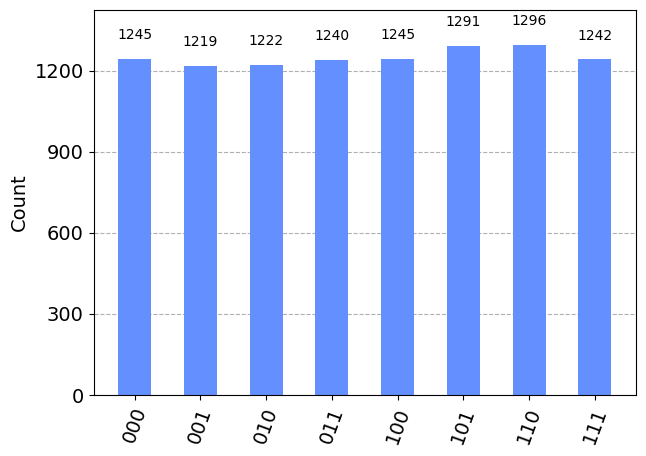

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def correct_binary_addition(qc):
    # Correct binary addition logic
    qc.cx(0, 2)
    qc.cx(1, 2)
    qc.cx(0, 1)

def incorrect_binary_addition(qc):
    # Incorrect binary addition logic (intentionally introduces errors)
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(0, 2)

def grover_oracle():
    qc = QuantumCircuit(3)
    binary_addition(qc)  # Use the correct or incorrect adder function based on the test scenario

    # Correct states based on the binary addition logic
    correct_states = ['000', '001', '010', '011', '100', '101']

    # All possible states for a 3-qubit system
    all_states = ['{0:03b}'.format(i) for i in range(8)]

    # Get the incorrect states by removing the correct states from all possible states
    incorrect_states = [state for state in all_states if state not in correct_states]

    # Use phase inversion to mark the incorrect states
    for state in incorrect_states:
        qc.x([i for i in range(3) if state[i] == '1'])
        qc.z(2)  # Apply Z gate to introduce a phase of -1
        qc.x([i for i in range(3) if state[i] == '1'])

    # Uncompute the binary addition to revert back to the original state
    binary_addition(qc)  # Use the correct or incorrect adder function based on the test scenario
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.cx(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    return qc

N = 2**3  # total number of possible states with 3 qubits
M = 2  # number of incorrect states
optimal_iterations = int(round((np.pi/4)*np.sqrt(N/M)))
n = 3

# Test the correct adder program
binary_addition = correct_binary_addition
grover_circuit = QuantumCircuit(n)
grover_circuit.h(list(range(3)))
num_iterations = 2
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(3))

grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
correct_adder_result = execute(grover_circuit, backend=backend, shots=10000).result()
correct_adder_counts = correct_adder_result.get_counts()
print("Correct adder outputs:")
print(correct_adder_counts)
plot_histogram(correct_adder_result.get_counts(grover_circuit))

# Test the incorrect adder program
binary_addition = incorrect_binary_addition
grover_circuit = QuantumCircuit(n)
grover_circuit.h(list(range(3)))
num_iterations = 2
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(3))

grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
incorrect_adder_result = execute(grover_circuit, backend=backend, shots=10000).result()
incorrect_adder_counts = incorrect_adder_result.get_counts()
print("Incorrect adder outputs:")
print(incorrect_adder_counts)
plot_histogram(incorrect_adder_result.get_counts(grover_circuit))
